# **Machine Learning**

1. Simple Linear Regression
2. Multiple Variable Linear Regression
3. Logistic Regression
4. Regularization
5. Cross Validation
6. Dimension Reduction
7. Clustering

# **1. Simple Linear Regression**

In [ ]:
import numpy as np
import sympy
from matplotlib import pyplot

%matplotlib inline
sympy.init_printing()

## 1.1 Linear Regression

Linear Regression은 종속 변수(변수, 결과) $y$와 한 개 이상의 독립 변수(입력, 원인) $X$의 선형 관계를 모델링하는 방법이다. 

선형 관계를 모델링한다는 것은 데이터를 가장 잘 설명하는 최적의 직선을 찾아내는 것이다. 즉, 찾아낸 직선을 사용하여 $y$와 $X$의 관계를 도출하는 것이다. 

그 중, $X$가 하나인 simple linear regression으로 실습을 진행하겠습니다. 변수가 하나인 직선을 정의하겠습니다.

$$f(x_i)=wx_i+b$$

<center>
<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/residuals.png
" width="400" height="300" />
</center>

우리의 데이터를 가장 잘 설명하는 직선은 예측값과 실제값이 가장 비슷해야 합니다. 우리의 모델이 예측한 결과는 $f(x_i)$이며 실제 데이터는 $y$입니다.

이때, 실제 데이터(위 그림에서 빨간 점)와 직선 사이의 차이를 줄이는 것이 목적입니다. 이를 위해 이를 바탕으로 cost function을 다음과 같이 정의할 수 있습니다.

$$cost\;function={1\over N}\sum_{i=1}^N (y_i-f(x_i))^2$$

그리고 만든 cost function을 최소로 하는 $w$와 $b$를 찾아야 한다. 이를 위해 우리는 Analytically와 Gradient descent를 이용해 찾아볼 것이다.

### Analytically

다음의 식이 주어질 때, 식의 최솟값을 찾는 방법은 미분값이 0이 되는 값을 찾는 것이다.

$$f(w)=w^2+3w-5$$

이를 sympy와 numpy를 통해 구해보겠습니다.

In [3]:
w = sympy.Symbol('w', real=True)

f = w**2 + 3*w - 5
f

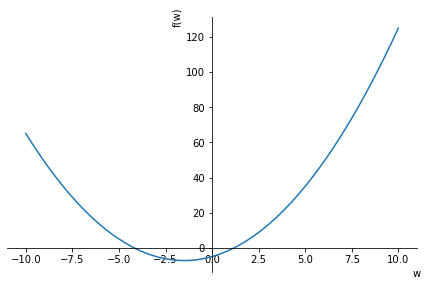

In [4]:
sympy.plotting.plot(f);

1차 미분한 식은 다음과 같이 알아볼 수 있습니다.

In [5]:
fprime = f.diff(w)
fprime

그리고 해당 식의 해는 다음과 같이 구할 수 있다.

In [6]:
sympy.solve(fprime, w)

### Gradient Descent

Gradient descent는 cost function의 $w$와 $b$의 최적값을 찾는 방법 중 하나로 기울기가 작은 방향으로 계속해서 이동하는 방법이다. 극소점이 여러 개면(non-convex function) 최적값을 찾기 까다롭지만 극소점이 하나라면(convec function) 최적값을 찾기 쉬워진다. 

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/descent.png
" width="400" height="300" />

Single linear regression에 경우 gradient descent는 

$$\theta_j := \theta_j - \alpha {\partial \over \partial \theta_j} J(\theta_0, \theta_1) \; (for\;j = 0\; and\; j = 1, \; \alpha\;is\;learning\;rate)\\
(J(\theta_0, \theta_1)\; is\; f(x_i),\; \theta_0=b,\; \theta_1=w)$$

을 반복함으로 구할 수 있다. 미분값 앞에 붙은 -로 인해 항상 기울기가 작아지는 방향으로 움직인다. 그리고 learning rate $\alpha$는 한 번에 이동할 거리를 정할 수 있다. 

이를 코드를 이용헤 구현해보겠습니다.


In [7]:
fpnum = sympy.lambdify(w, fprime) # type: function

w = 10.0 # starting guess for the min
for i in range(1000):
    w = w - fpnum(w) * 0.01 # with 0.01 alpha

print(w)


-1.4999999806458753


위에서 볼 수 있듯이 두 가지 방법이 같은 값이 나오는 것을 확인할 수 있습니다. 

### 데이터 만들기

실제로 linear한 관계를 가진 데이터 셋을 사용하기 위해 직접 데이터 셋을 만들어보도록 하겠습니다. 이때, Numpy 안에 Normal distribution 함수를 통해 조금의 noise를 추가하여 생서앟도록 하겠습니다.

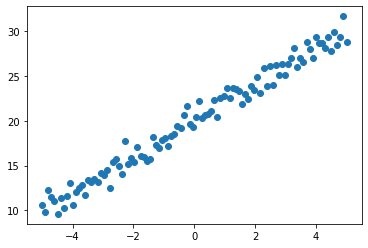

In [9]:
x_data = np.linspace(-5, 5, 100) # -5 ~ 5 사이의 100개의 데이터 생성
w_true = 2
b_true = 20

y_data = w_true*x_data + b_true + np.random.normal(size=len(x_data))

pyplot.scatter(x_data, y_data);

먼저 데이터의 cost function을 나타내면

In [11]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
cost_function

으로 나타낼 수 있다. 이제 $w$와 $b$의 초기값을 정의하고 gradient descent 방법을 적용하여 cost function을 최소로 하는 $w$와 $b$를 구할 수 있다.

In [12]:
grad_b = sympy.lambdify([w, b, x, y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w, b, x, y], cost_function.diff(w), 'numpy')

w, b = 0, 0 # w, b의 초기값
for i in range(1000):
    descent_b = np.sum(grad_b(w, b, x_data, y_data))/len(x_data)
    descent_w = np.sum(grad_w(w, b, x_data, y_data))/len(x_data)
    w = w - descent_w * 0.01 # alpha = 0.01
    b = b - descent_b * 0.01 # alpha = 0.01
    
print(w)
print(b)

2.0254061088339155
20.079921356708898


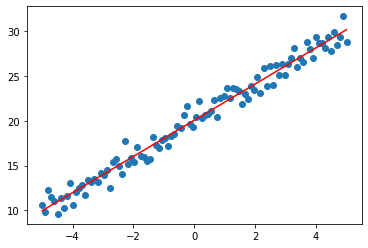

In [13]:
pyplot.scatter(x_data, y_data)
pyplot.plot(x_data, w*x_data + b, '-r');

우리가 구한 직선이 만든 데이터 셋과 잘 맞는 것을 볼 수 있다.

## 1.2 Earth temperature over time

그렇다면 위에서 배운 것들로 시간 흐름에 따른 지구의 온도 변화를 분석할 수 있다. 

Global temperature anomaly라는 지표를 통해서 분석해보겠습니다. 여기서 temperature anomaly는 어떠한 기준 온도 값을 정해놓고 그것과 차이를 나타낸 것입니다. 예를 들어 temperature anomaly가 양수의 높은 값을 가지면 평소보다 따뜻한 기온을, 음수의 작은 값이라면 평소보다 차가운 기온을 가졌단 것을 알려줍니다.

세계 여러 지역의 온도가 각각 다 다르기 때문에 global temperature anomaly를 사용해서 분석을 사용하겠습니다. 

### Step 1: Read a data file

먼저 NOAA(National Oceanic and Atmospheric Administration) 홈페이지에서 데이터를 가져옵니다. 

In [26]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'data/land_global_temperature_anomaly-1880-2016.csv')

('data/land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x2e77f58f310>)

다운로드한 데이터를 numpy를 이용해 불러오겠습니다.

In [27]:
fname = 'data/land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = np.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

### Step 2: Plot the data

matplotlib을 이용해 2D plot을 찍어보면

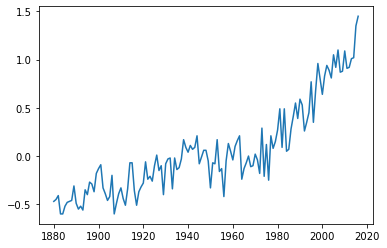

In [18]:
pyplot.plot(year, temp_anomaly);

위의 plot에 여러 정보를 추가하여 나타내면

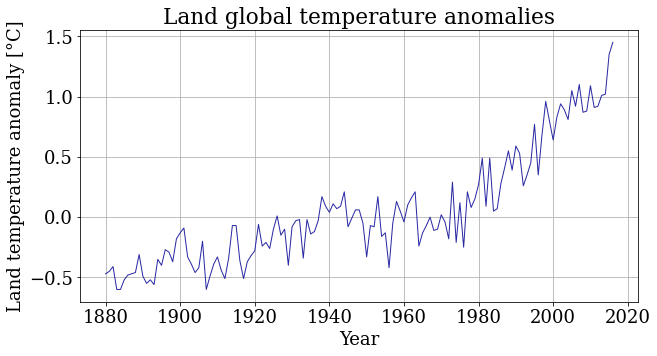

In [20]:
pyplot.rc('font', family='serif', size=18)
pyplot.figure(figsize=(10, 5))

# plotting
pyplot.plot(year, temp_anomaly, color="#2929a3", linestyle='-', linewidth=1)
pyplot.title("Land global temperature anomalies")
pyplot.xlabel("Year")
pyplot.ylabel("Land temperature anomaly [°C]")
pyplot.grid();

### Step 3: Analytically

먼저 직선을 $f(x_i)=wx+b$로 정의한다. 그리고 이 직선에 대해 cost function을 정의하면

$${1\over n}\sum_{i=1}^n (y_i-f(x_i))^2={1\over n}\sum_{i=1}^n (y_i-(wx_i+b))^2$$

과 같다. 이 식에 대해 먼저 $b$에 대해 미분하면

$$\frac{\partial{J(w,b)}}{\partial{b}} = \frac{1}{n}\sum_{i=1}^n -2(y_i - (wx_i+b)) = \frac{2}{n}\left(b + w\sum_{i=1}^n x_i -\sum_{i=1}^n y_i\right) = 0$$

이고 이를 만족하는 $b$는 

$$ b = \vec{y} - w\vec{x}\; (\vec{x}={\sum_{i=1}^n x_i\over n},\;\vec{y}={\sum_{i=1}^n y_i\over n}) $$

이다. 다음으로 $w$에 대해 미분하면

$$\frac{\partial{J(w,b)}}{\partial{w}} =  \frac{1}{n}\sum_{i=1}^n -2(y_i - (wx_i+b))x_i = \frac{2}{n}\left(b\sum_{i=1}^nx_i + w\sum_{i=1}^n x_i^2 - \sum_{i=1}^n x_iy_i\right)$$ 

이 된다. 여기에 아까 구한 $b$를 대입한 후 0이 되는 $w$값을 구하하면

$$w = \frac{\sum_{i=1}^ny_i(x_i-\bar{x_i})}{\sum_{i=1}^nx_i(x_i-\bar{x_i})}$$

가 됩니다. 이렇게 $w$와 $b$의 값을 구했습니다. 이를 코드를 통해서 적용해보겠습니다.

In [22]:
w = np.sum(temp_anomaly * (year - year.mean())) / np.sum(year * (year - year.mean()))
b = a_0 = temp_anomaly.mean() - w * year.mean()

print(w)
print(b)

0.01037028394347266
-20.148685384658464


이제 그래프로 그려서 확인해보겠습니다.

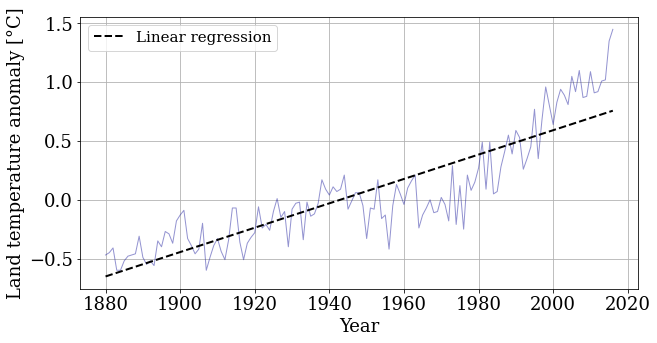

In [24]:
reg = b + w * year

pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5)
pyplot.plot(year, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

데이터와 직선이 어느 정도 맞는 것을 확인할 수 있다.

# **2. Multiple Variable Linear Regression**

## 2.1 Multiple Features

먼저 notation부터 정의한다.
- $n$ = number of features(= dimension = attribute)
- $x^{(i)}$ = i번째 입력(= feature vector)
- $x_j^{(i)} = i번째 입력의 j번째 feature


feature가 여러 개이므로 hypothesis는

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

이다. 이때 $x_0=1$이다. 그리고 $x$와 $\theta$가 아래와 같기에

$$x=\begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_n \end{bmatrix} \in \mathbb{R}^{n+1}, \quad
\theta=\begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix} \in \mathbb{R}^{n+1} \\
h_{\theta}(x) = \theta^Tx$$

으로 표현할 수 있다.


## 2.2 Feature Scaling

Feature scaling은 각 feature들을 비슷한 scale로 만드는 것이다. 예를 들어 집의 가격을 예측할 때, 방의 개수와 집의 크기가 feature로 주어진다면 $x_1 = size(0 \sim 2000 feet^2), \; x_2 = number of rooms(1 \sim 5)$이란 예시를 잡을 수 있다. 이러면 비슷한 영향력을 주기 위해 hypothesis는

$$h_{\theta}(x) = \theta_0 + 10\theta + 10000\theta$$

이런 식으로 가중치들의 차이가 커진다. 이렇게 되면 gradient descent할 때, 문제가 생긴다. $\theta_1$은 조금만 변해도 결과에 영향을 크게 미치지만 $\theta_2$는 크게 변해도 영향을 작게 미친다. 이렇게 되면 $\theta_1$ 방향의 기울기는 급격하기에 너무 많이 이동하고 반대로 $\theta_2$ 방향의 기울기는 완만하여 너무 적게 움직인다.

<center><img src="https://miro.medium.com/max/600/1*yi0VULDJmBfb1NaEikEciA.png"></center>


그렇기에 feature들의 영향력을 동등하게 주기 위해 normalize를 해야 한다. 방법은 크게 최소, 최대를 이용하는 방법과 평균과 표준편차를 이용하는 방법이 있다.

### min-max normalization
$$1) \quad x_i = {x_i \over max(x)} \; \Rightarrow \; 0 \leq x_i \leq 1 \\
2) \quad x_i = {x_i - min(x) \over max(x) - min(x)} \; \Rightarrow \; 0 \leq x_i \leq 1 \\
3) \quad x_i = {x_i - mid(x) \over max(x) - mid(x)} \; \Rightarrow \; -1 \leq x_i \leq 1 \quad (mid={max+min \over 2})$$


### Z-Score normalization
$$x_i={x_i - mean(x) \over std(x)}$$

이러면 평균이 0, 표준편차가 1이 나오게 된다. 평균과 표준편차를 이용한 normalize를 자주 사용한다. 왜냐하면 특이하게 크거나 작은 값들이 있으면 대부분의 값이 한쪽으로 쏠려버리기 때문이다.


## 2.3 Gradient Descent
먼저 feature가 1개였을 때를 다시 가져와보면

$$\theta_0 := \theta_0 - \alpha {1 \over m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) \\
\theta_1 := \theta_1 - \alpha {1 \over m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}$$

이다. 이를 이용해 여러 feature를 넣으면 gradient descent를 구할 수 있다.

$$\begin{aligned}
\theta_0 := \theta_0 - \alpha {1 \over m} &\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_0^{(i)} \quad (x_0 = 1) \\
\theta_1 := \theta_1 - \alpha {1 \over m} &\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_1^{(i)} \\
\theta_1 := \theta_1 - \alpha {1 \over m} &\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_2^{(i)} \\
\vdots \\
\theta_j := \theta_j - \alpha {1 \over m} &\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} \quad (j=0, \cdots, n)
\end{aligned}$$


## 2.4 Polynomial Regression
이제 다시 feature가 1개인 경우를 생각해보자. 집의 크기와 집의 가격은 비례하지만 크기가 커질수록 가격의 증가폭은 작아진다. 그렇기에 앞에서 배운 simple linear regression을 그대로 사용하면 크기가 커질수록 예측값과 실제값의 차이는 기하급수적으로 커질 것이다. 

이때 그래프의 형태가 루트함수에 가까우므로 feature에 $\sqrt{size}$를 추가하여 multiple varialbe linear regression으로 풀어주면 된다. 그렇다면 hypothesis는 다음과 같이 나올 것이다.

$$h_{\theta}(x) = \theta_0 + \theta_1 (size) + \theta_2(\sqrt{size})$$

챕터 4장의 실습에서 한 번 더 다룰 것이니 참고바랍니다.

## 실습 1. auto miles per gallon(MPG)

### 1) Dataset
이번 과제에서 사용할 데이터셋은 자동차의 여러 기술적인 사양들을 고려하여 연비를 예측하는 MPG 데이터셋입니다. 먼저 데이터를 불러옵시다.

In [1]:
import pandas as pd
import seaborn
seaborn.set()

from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp6data3'
urlretrieve(URL, 'data/auto_mpg.csv')

('data/auto_mpg.csv', <http.client.HTTPMessage at 0x2242f02d4f0>)

In [3]:
mpg_data = pd.read_csv('data/auto_mpg.csv')
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.7+ KB


총 392개의 데이터가 있고 9개의 정보들이 있습니다. 

여기서 car name 은 object로 자동차의 이름을 담고 있습니다. 

그리고 origin은 int로 정수 형태이지만 이것이 만들어진 도시로 categorical 한 값입니다(ex. 서울 : 1, 경기 : 2, ... ). 

그렇기 때문에 이번에 linear regression을 할 때는 car name, origin, mpg 값은 제외하고 생각하도록 하겠습니다. 

In [5]:
y_col = 'mpg'
x_cols = mpg_data.columns.drop(['car name', 'origin', 'mpg'])

print(x_cols)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year'],
      dtype='object')


### 2) Data exploration
linear regression을 진행하기 전에 먼저 자동차의 정보들과 연비와의 1대1 상관관계를 시각화하여 알아보겠습니다. 

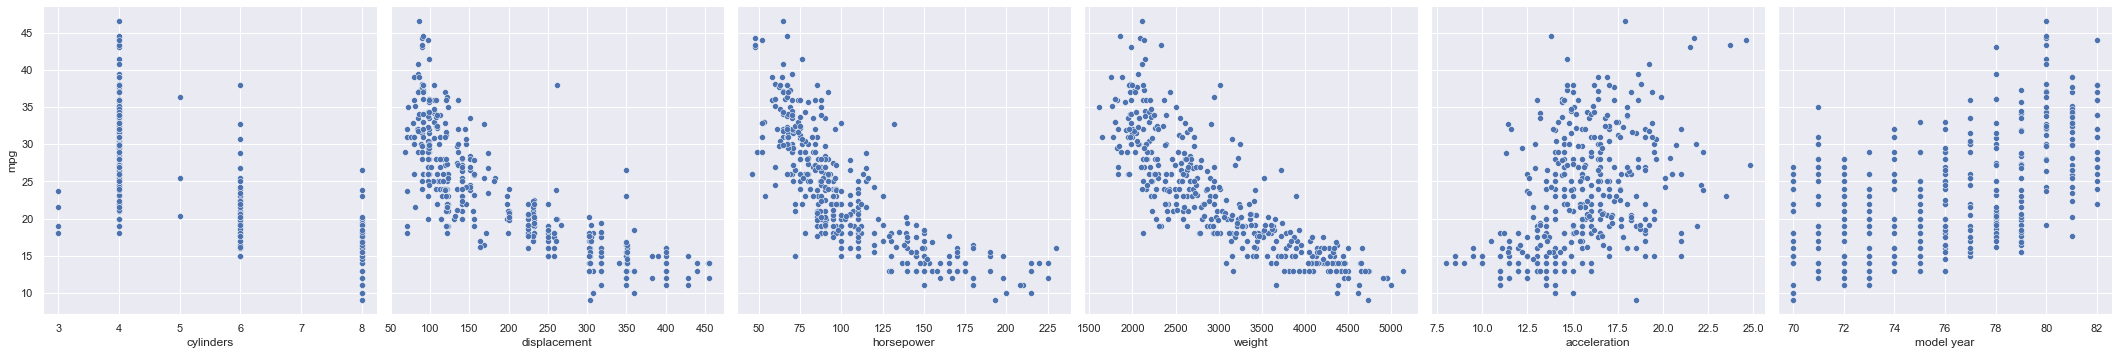

In [7]:
seaborn.pairplot(data=mpg_data, height=5, aspect=1, x_vars=x_cols, y_vars=y_col);

Accerlation과 model_year의 정보는 비례하고 나머지는 반비례함을 알 수 있습니다. 이러한 상관관계를 통해서 linear model이 연비를 예측하는데 충분함을 알 수 있습니다.

### 3) Linear model in matrix form
앞서 배운 것을 이용하여 $\theta$를 $X$로, $h(x)$를 $\hat{y}$로 바꾸면 

$$\hat{y}=\sum_{i=0}^d w_i x_i = X^T W$$

으로 $X$는 입력 변수들로 이루어진 벡터, $W$는 입력 변수에 곱해지는 계수들로 이루어진 벡터입니다. 이를 행렬로 표현하면 

$$\hat{\mathbf{y}} = \begin{bmatrix}
\hat{y}^{(1)}  \\
\hat{y}^{(2)}\\
\vdots  \\
\hat{y}^{(N)}
\end{bmatrix} =
\begin{bmatrix}
x_0^{(1)} &  x_1^{(1)} & \cdots & x_d^{(1)} \\
x_0^{(2)} &  x_1^{(2)} & \cdots & x_d^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
x_0^{(N)} &  x_1^{(N)} & \cdots & x_d^{(N)}
\end{bmatrix} \begin{bmatrix}
w_0  \\
w_1\\
\vdots  \\
w_d 
\end{bmatrix} 
= \mathbf{X}\mathbf{w}$$

입니다. 여기서 $\mathbf{x}$ 는 입력 변수들을 행렬의 형태로 나타낸 것입니다. 그리고 맨 앞에 $x_0 = 1$을 추가했었기 때문에 $\mathbf{X}$의 맨 왼쪽 행렬은 1로 이루어져 있습니다. 

그리고 $\hat{\mathbf{y}}$는 예측한 변수들을 모아놓은 벡터이고, $\mathbf{y}$는 실제 연비들을 모아놓은 벡터입니다. 

이제 이를 코드로 표현해보겠습니다.

In [8]:
from autograd import numpy
from autograd import grad

In [9]:
X = mpg_data[x_cols].values
X = numpy.hstack((numpy.ones((X.shape[0], 1)), X)) # pad is to the left of input matrix
y = mpg_data[y_col].values

print("X.shape = {}, y.shape = {}".format(X.shape, y.shape))

X.shape = (392, 7), y.shape = (392,)


이제 cost function을 mean squared error를 사용하여 정의해보겠습니다.

$$L(y,\hat{y})={1 \over N} \sum_{i=1}^N (y^{(i)}-\hat{y}^{(i)})^2$$

cost function과 linear regression model을 코드로 나타내면 다음과 같습니다.

In [10]:
def linear_regression(params, X):
    '''
    The linear regression model in matrix form.
    Arguments:
        params: 1D array of weights for the linear model
        X     : 2D array of input values
    Returns:
        1D array of predicted values
    '''
    return numpy.dot(X, params)

def cost_function(params, model, X, y):
    '''
    The mean squared error loss function.
    Arguments:
        params: 1D array of weights for the linear model
        model : function for the linear regression model
        X     : 2D array of input values
        y     : 1D array of predicted values
    Returns:
        float, mean squared error
    '''
    y_pred = model(params, X)
    return numpy.mean( numpy.sum((y-y_pred)**2) )

### 4) Find the weights using gradient descent
이제 gradient descent로 cost function을 최소로 해주는 계수를 찾아보겠습니다. autograd.grad() 함수로 기울기를 구해서 사용하겠습니다.

In [11]:
gradient = grad(cost_function)

이제 한 번 gradient descent를 진행해보면

In [13]:
max_iter = 30
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
    descent = gradient(params, linear_regression, X, y)
    params = params - descent * alpha
    loss = cost_function(params, linear_regression, X, y)
    if i % 5 == 0:
        print(f"iteration {i}, loss = {loss}")

iteration 0, loss = 9.668521029386562e+18
iteration 5, loss = 5.933187473385039e+87
iteration 10, loss = 3.6409616934209154e+156
iteration 15, loss = 2.234313699411096e+225
iteration 20, loss = 1.37110964841974e+294
iteration 25, loss = inf


C:\Users\DELPHI~1\AppData\Local\Temp/ipykernel_8900/382964456.py:24: RuntimeWarning: overflow encountered in square
  return numpy.mean( numpy.sum((y-y_pred)**2) )


loss가 무한대로 넘어가 오류가 나타난 것을 알 수 있습니다. 왜 그럴까요?

### 5) Feature scaling
gradient descent를 진행했더니 loss가 무한대로 발산했습니다. 이것은 입력 변수들 중에 특정값들이 너무 커서 일어난 일입니다. 입력 데이터들의 max와 min 값을 한 번 출력해보겠습니다.

In [14]:
mpg_data[x_cols].describe().loc[['max', 'min']]

,cylinders,displacement,horsepower,weight,acceleration,model year
max,8.0,455.0,230.0,5140.0,24.8,82.0
min,3.0,68.0,46.0,1613.0,8.0,70.0


weight값을 보면 다른 값들에 비해 매우 큰 것을 알 수 있습니다. 그래서 우리는 값들을 비슷한 크기를 가지도록 바꿔줄 필요가 있습니다. 이번에 사용할 방법은 위에서 봤던 min-max scaling입니다. 최대 1, 최소 0으로 맞춰줍니다. 변환식을 다시 불러오겠습니다.

$$x' = \frac{x - \min(x)}{\max(x)-\min(x)}$$

우리는 이 normalization을 scikit-learn이라는 패키지를 이용해서 하도록 하겠습니다. 

In [15]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(mpg_data[x_cols])
X_scaled = numpy.hstack((numpy.ones((X_scaled.shape[0], 1)), X_scaled))

pd.DataFrame(X_scaled).describe().loc[['max', 'min']]

,0,1,2,3,4,5,6
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0


이때, 0번째 행은 처음에 1을 추가해준 행이기에 유지되는 것이 맞습니다. 이제 scaling된 데이터로 다시 gradient descent를 해보겠습니다. 

In [16]:
max_iter = 1000
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
    descent = gradient(params, linear_regression, X_scaled, y)
    params = params - descent * alpha
    loss = cost_function(params, linear_regression, X_scaled, y)
    if i % 100 == 0:
        print(f"iteration {i}, loss = {loss}")

iteration 0, loss = 116081.11124253299
iteration 100, loss = 5035.737208606848
iteration 200, loss = 4694.653830594689
iteration 300, loss = 4613.631473760374
iteration 400, loss = 4583.327630964672
iteration 500, loss = 4568.155268087918
iteration 600, loss = 4559.2685938773875
iteration 700, loss = 4553.692765631067
iteration 800, loss = 4550.09985725416
iteration 900, loss = 4547.761957132872


학습된 params는 다음과 같으며 우리는 예측값을 params와 $X$의 곱으로 나타낼 수 있습니다.

In [17]:
print(params)
y_pred_gd = X_scaled @ params

[ 27.56342896  -1.24000064   1.70706502  -0.2853682  -23.08358717
   1.06664226   8.99271696]


### 6) How accurate is the model?
이제 우리가 만든 모델이 얼마나 정확한지 알아보도록 하겠습니다. Regression 문제에서는 주로 두 개의 기본 지표가 있습니다. Mean Absolute Error(MAE)와 Root Mean Squared Error(RMSE)입니다.

$$\text{MAE}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{N} \sum_{i=1}^N \left\vert y^{(i)} - \hat{y}^{(i)}\right\vert$$
$$\text{RMSE}(\mathbf{y}, \hat{\mathbf{y}}) =\sqrt{ \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2}$$

이 지표들도 scikit-learn 패키지를 통해서 사용해보겠습니다. 

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, y_pred_gd)
rmse = mean_squared_error(y, y_pred_gd, squared=False)
print("MAE  = {}".format(mae))
print("RMSE = {}".format(rmse))

MAE  = 2.6139916011560445
RMSE = 3.4055205674118403


## 실습 2. Gradient descent land global temperature anomaly dataset
저번 챕터에서 사용한 anomaly dataset도 이용해보겠습니다.

In [20]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'data/land_global_temperature_anomaly-1880-2016.csv')

('data/land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x224311f2520>)

In [22]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

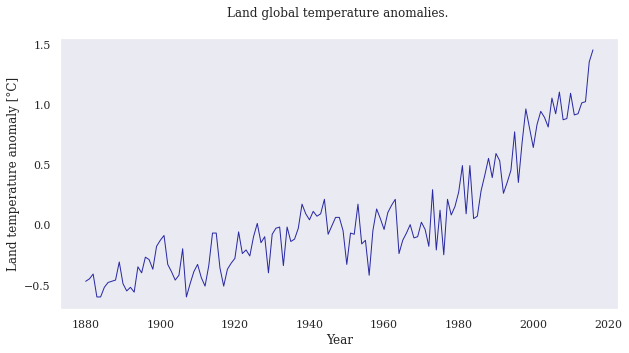

In [24]:
fname = 'data/land_global_temperature_anomaly-1880-2016.csv'
year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

pyplot.rc('font', family='serif', size='18')
pyplot.figure(figsize=(10, 5))

# plotting
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1) 
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

저번 챕터는 직접 계산하는 방법으로 linear regression을 진행했습니다. 이번에는 gradient descent를 사용해보겠습니다. 먼저 직선을 정의합니다.

$$f(x_i) = wx + b$$

그리고 cost function 역시 정의해줍니다.

$$\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2 = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$

이제 코드를 이용해 계산해보겠습니다.

In [29]:
# cost function 정의
w, b, x, y = sympy.symbols('w b x y')
cost_function = (w * x + b - y)**2

grad_b = sympy.lambdify([w, b, x, y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w, b, x, y], cost_function.diff(w), 'numpy')

w, b = 0, 0
for i in range(1000):
    descent_b = numpy.sum(grad_b(w, b, year, temp_anomaly)/len(year))
    descent_w = numpy.sum(grad_w(w, b, year, temp_anomaly)/len(year))
    w = w - descent_w * 0.001 # alpha is 0.001
    b = b - descent_b * 0.001
    
print(w)
print(b)

nan
nan


<lambdifygenerated-6>:2: RuntimeWarning: overflow encountered in multiply
  return 2*x*(b + w*x - y)
C:\Users\DELPHI~1\AppData\Local\Temp/ipykernel_8900/1121074269.py:12: RuntimeWarning: invalid value encountered in double_scalars
  w = w - descent_w * 0.001 # alpha is 0.001


이번에도 무한대로 발산했습니다. 이것도 위의 예시와 마찬가지로 입력 변수 간의 차이가 너무나 크기 때문에 일어난 문제입니다. 그래서 normalization을 진행하여 문제를 해결해보겠습니다. 이번엔 Z-Score normalization을 사용하겠습니다.

$$x' = \frac{x - \text{mean}(x)}{\text{std}(x)}$$

여기서 mean은 평균, std는 표준 편차입니다. 이를 사용해 gradient descent를 다시 진행해보겠습니다.

In [30]:
# Z-Score normalization
year_scaled = (year - year.mean()) / year.std()
temp_anomaly_scaled = (temp_anomaly - temp_anomaly.mean()) / temp_anomaly.std()

w, b = 0, 0
for i in range(1000):
    descent_b = numpy.sum(grad_b(w, b, year_scaled, temp_anomaly_scaled)) / len(year_scaled)
    descent_w = numpy.sum(grad_w(w, b, year_scaled, temp_anomaly_scaled)) / len(year_scaled)
    w = w - descent_w * 0.001
    b = b - descent_b * 0.001
    
print(w)
print(b)

0.756766964479979
5.551763428541569e-17


$w$와 $b$를 구했습니다. 이를 이용해 그래프에 그려보면 linear regression이 잘 된 것을 확인할 수 있습니다.

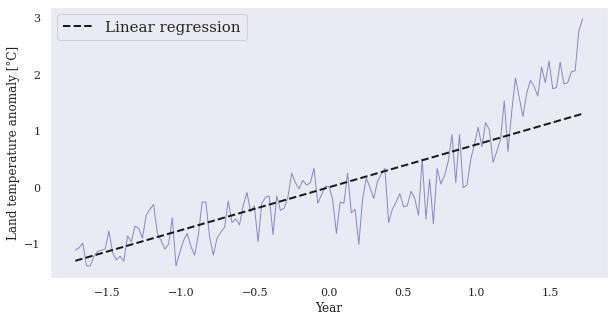

In [31]:
reg = b + w * year_scaled

pyplot.figure(figsize=(10, 5))

pyplot.plot(year_scaled, temp_anomaly_scaled, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year_scaled, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

# **3. Logistic Regression**

불연속적인 값을 갖는 데이터들은 앞서 배운 linear regression을 사용할 수 없다. 예를 들어 스팸 메일의 분류 여부는 0(스팸) 또는 1(스팸아님)만 나오게 됩니다. 이러한 문제를 classification 문제라고 하며 이를 풀기 위해 logistic regression을 사용합니다.

## 3.1 Logistic Function


Logistic regression을 진행하기 위해서는 출력값을 0과 1로 맞추어야 합니다. 이를 위해 logistic function(sigmoid function)을 사용합니다.

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

Logistic regression을 진행할 때 입력 데이터를 $x$, 실제 class 값을 $y$, 예측된 출력값을 $\hat{y}$라고 하면 $x$는 두 가지 변환을 거쳐 $\hat{y}$가 된다.

$$z = wx + b \\ \hat{y} = \sigma(z)$$

우리의 목표는 $\hat{y}$가 실제 $y$가 가장 가깝도록 $w$와 $b$를 찾는 것입니다.

이제 코드를 통해서 logistic function을 알아봅시다.

In [1]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline

In [2]:
z = sympy.Symbol('z', real=True)

logistic = 1 / (1 + sympy.exp(0-z))
logistic

1/(1 + exp(-z))

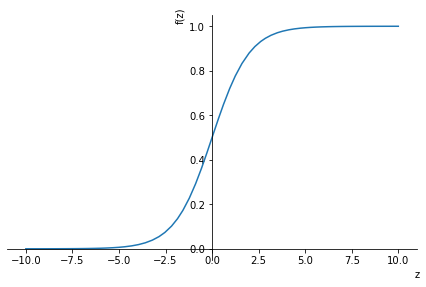

In [3]:
sympy.plotting.plot(logistic);

위 그래프를 보면 $z=0$일 때 출력값이 0.5가 됩니다. 그리고 양수일 때는 1에 가까워지고 음수일 때는 0에 가까워집니다. 즉, $z$값을 0과 1 사이로 표현할 수 있습니다. 

이제 데이터를 직접 만들어서 확인해보겠습니다.

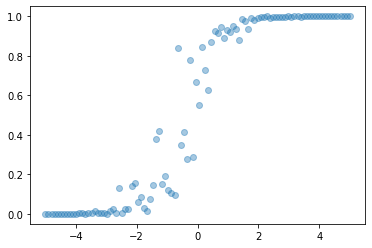

In [7]:
# synthetic data
x_data = numpy.linspace(-5, 5, 100)
w = 2
b = 1
numpy.random.seed(0)
z_data = w * x_data + b + numpy.random.normal(size=len(x_data))
y_data = 1 / (1 + numpy.exp(-z_data))

pyplot.scatter(x_data, y_data, alpha=0.4);

위 데이터는 전 챕터와 마찬가지로 조금의 noise를 추가해서 데이터를 생성한 것입니다. 

이 함수를 logistic regression하기 위해 실제 class를 정해주어야 합니다. numpy 패키지 안의 where 함수로 0.5보다 큰 값을 1, 작은 값을 0으로 클래스를 부여해 주겠습니다.

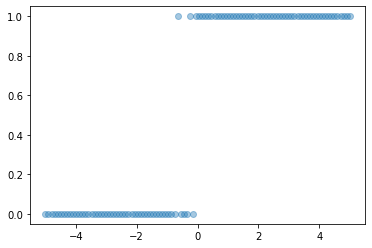

In [9]:
y_data = numpy.where(y_data >= 0.5, 1, 0)
pyplot.scatter(x_data, y_data, alpha=0.4);

## 3.2 Decision Boundary

Decision boundary는 두 클래스를 나누는 경계를 의미한다. 

<image src="https://www.oreilly.com/library/view/data-analysis-with/9781788393720/assets/b8521b37-5abf-4142-97d5-f1c8d4bb20cb.png">

그림에서 볼 수 있듯이, 경계가 직선일 필요는 없다.

## 3.3 Logistic Loss Function(Cost Function)

Logistic regression 문제를 해결할 때는 linear regression처럼 아래의 mean square error을 사용하면 안 된다. 

$$\frac{1}{n} \sum_{i=1}^n (y_i - \sigma(wx_i + b))^2$$

왜냐하면 logistic regression은 convec한 형태가 아니기 때문이다. 간단한 예시를 위해 $w = 1, b=0$일 때 

$(x, y) : (-1, 2), (-20, -1), (-5, 5)$ 데이터를 가지고 cost function을 그래프로 나타내면 다음과 같습니다.

In [11]:
badloss = (2 - 1/(1+ sympy.exp(-z)))**2 + \
          (-1 - 1/(1+ sympy.exp(-20*z)))**2  + \
          (5 - 1/(1+ sympy.exp(-5*z)))**2
badloss

(-1 - 1/(1 + exp(-20*z)))**2 + (2 - 1/(1 + exp(-z)))**2 + (5 - 1/(1 + exp(-5*z)))**2

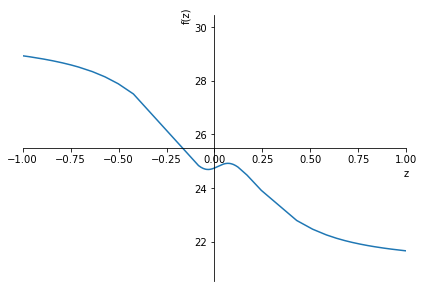

In [12]:
sympy.plotting.plot(badloss, xlim=(-1,1));

위에서 알 수 있듯 중간에 기울기가 0인 local minimum에 도달하여 멈추게 됩니다. 

그래서 mean square error말고 다른 방법을 찾기 위해 cost function의 의미를 다시 한번 생각해 보겠습니다. 

우리가 어떤 값을 예측할 때 많이 틀렸다면, 예측하는데 쓰인 변수들을 많이 바꾸어야 합니다. 그에 비해 조금 틀렸다면, 이미 잘 예측하고 있기 때문에 변수들을 조금 바꾸어야 합니다. 많이 바꾸고, 조금 바꾸는 것은 기울기의 크기가 정합니다. 이러한 원리를 사용해서 linear regression에서는 square error를 쓰는 것입니다. 

이 원리를 logistic regression에도 적용해 보겠습니다. 

$z = wx + b$ 일 때 cost function $L$을 b에 대해서 미분을 해보겠습니다. Chain rule을 사용하면 다음과 같게 됩니다. 

$$\frac{\partial{L}}{\partial{b}} = \frac{\partial{L}}{\partial{\sigma(z)}} \frac{\partial{\sigma(z)}}{\partial{z}}\frac{\partial{z}}{\partial{b}}$$

이 때 $\frac{\partial{z}}{\partial{b}}$는 1이 돼서 사라집니다. 

이제 $\frac{\partial{\sigma(z)}}{\partial{z}}$에 대해서 알아보겠습니다. 

In [14]:
lprime = logistic.diff(z)
lprime

exp(-z)/(1 + exp(-z))**2

위에서 나온 $\sigma'(z)$를 정리를 해보겠습니다. 


$$\frac{\partial{\sigma(z)}}{\partial{z}} = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1}{1+e^{-z}} \times \frac{e^{-z}}{1+e^{-z}} = \sigma(z)\times \frac{e^{-z}}{1+e^{-z}} $$
가 되고, 여기서 $\frac{e^{-z}}{1+e^{-z}} $를 다시 정리해보면 다음과 같습니다. 

$$\frac{e^{-z}}{1+e^{-z}} = \frac{1 + e^{-z} -1}{1 + e^{-z}} = 1 - \frac{1}{1+e^{-z}} = 1-\sigma(z)$$

결론적으로, 
$$\sigma'(z) = \sigma(z) ( 1 - \sigma(z))$$
가 됩니다. 


다시한번 위 식을 정리해보면 다음과 같습니다. 


$$\frac{\partial{L}}{\partial{b}} = \frac{\partial{L}}{\partial{\sigma(z)}} \frac{\partial{\sigma(z)}}{\partial{z}} = \frac{\partial{L}}{\partial{\sigma(z)}} \sigma(z) (1-\sigma(z))$$

여기서 우리는 $\frac{\partial{L}}{\partial{b}}$의 값이 예측 값과 실제 값의 차이가 클수록 크고, 작을수록 작게 하고 싶기 때문에 $\frac{\partial{L}}{\partial{b}} = (y - \sigma(z))$로 정의하겠습니다. 정리하면 다음과 같습니다. 

$$\frac{\partial{L}}{\partial{\sigma(z)}} = \frac{(y-\sigma(z))}{\sigma(z)(1-\sigma(z))}$$

이제 위 식을 $L$에 대해서 코드를 통해서 정리해보겠습니다. 코드를 간단히 하기 위해서 $\sigma(z) = a$라고 치환해서 생각하겠습니다. 

In [15]:
a, y = sympy.symbols('a y', real=True)

In [16]:
dLda = (y - a)/a/(1 - a)
dLda

(-a + y)/(a*(1 - a))

In [17]:
L = sympy.integrate(dLda, a)
L

y*log(a) + (1 - y)*log(a + (1 - 2*y)/(2*y - 1))

In [18]:
sympy.simplify(L)

y*log(a) - (y - 1)*log(a - 1)

여기서 $a = \sigma(z)$이기 때문에 $ a < 1 $이 됩니다. 그래서 $\log$ 안의 값이 음수가 되면 안되기 때문에 식을 변환해 줍니다. 

In [19]:
L = -y*sympy.log(a) + (y-1)*sympy.log(1-a)
L

-y*log(a) + (y - 1)*log(1 - a)

우리가 구한 cost function $L$은 
$L = -y \log(a) + (y-1)\log(1-a)$ 이 됩니다. 

이제 실제로 차이가 클 때 $L$값이 커지는지 알아보도록 하겠습니다. 


먼저 만약 $y=1$이라면 $L = -\log(a)$만 남게 됩니다. 그래프로 표현하면 다음과 같습니다. 

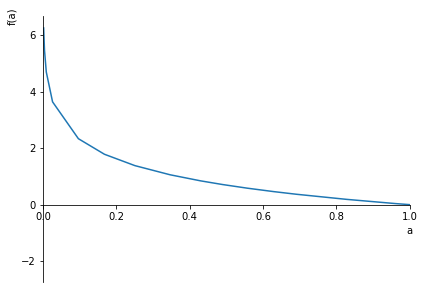

In [20]:
sympy.plotting.plot(-sympy.log(a), xlim=(0,1));

실제 class 가 1일 때 예측 값이 0에 가까워지면 cost function값이 커지고, 1에 가까워지면 cost function이 작아지는 것을 알 수 있습니다. 이는 우리가 원래 목표했던 것과 동일합니다. 

이제 $y=0$이라면 $L = \log(1-a)$ 만 남게 됩니다. 이를 또한 그래프로 표현하면 다음과 같습니다. 

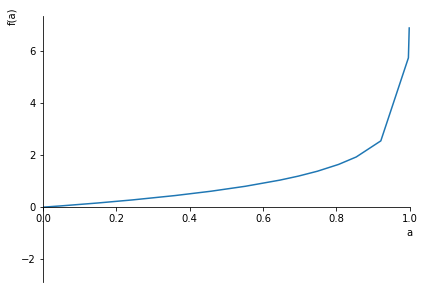

In [21]:
sympy.plotting.plot(-sympy.log(1-a), xlim=(0,1));

이번에도 예측값이 실제 값이랑 가까워지면 cost function값이 작아지고 멀어지면 커지게 됨을 알 수 있습니다. 

## 3.4 Gradient Descent

Gradient descent를 얻기 위해 cost function을 미분해야 합니다. 

$$J(\theta)_j = -\log\frac{1}{1+e^{-\theta_j x}}$$

$$\frac{\partial J(\theta_j)}{\partial \theta_j} = -\frac{e^{-\theta_j x}}{1 + e^{-\theta_j x}} x_j $$

그렇기에, 최종적으로 다음과 같은 식이 나옵니다.

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) \\
\theta_j := \theta_j - \alpha \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)} $$

## 3.5 Find the parameters using autograd function

이제 logistic regression의 전체적인 과정을 코드로 알아보겠습니다.

In [23]:
logistic

1/(1 + exp(-z))

In [24]:
w, b, x, y = sympy.symbols('w b x y')
logistic = 1 / (1 + sympy.exp(-w * x - b))

Loss = -y * sympy.log(logistic) - (1 - y) * sympy.log(1 - logistic)
Loss

-y*log(1/(exp(-b - w*x) + 1)) - (1 - y)*log(1 - 1/(exp(-b - w*x) + 1))

지금까지 diff를 통해 기울기를 구했습니다. 그런데 식이 복잡해질수록 속도가 느려지기 때문에 이번엔 autograd를 통해서 구해보겠습니다.

In [25]:
from autograd import numpy # import the autograd-wrapped version of numpy
from autograd import grad # import the gradient calculator

# note: the namespace numpy is the autograd wrapper to numpy
def logistic(z):
    """The logistic function"""
    return 1 / (1 + numpy.exp(-z))


def logistic_model(params, x):
    """A prediction model based on the logistic function composed with wx + b
    Arguments:
        params: array(w, b) of model parameters
        x: array of x data"""
    w = params[0]
    b = params[1]
    z = w * x + b
    y = logistic(z)
    return y


def log_loss(params, model, x, y):
    """The logistic loss function
    Arguments:
        params: array(w, b) of model parameters
        model: the python function for the logistic model
        x, y: arrays of input data to the model"""
    y_pred = model(params, x)
    return -numpy.mean(y * numpy.log(y_pred) + (1 - y) * numpy.log(1 - y_pred))

In [26]:
# get a function to compute the gradient of the logistic loss
gradient = grad(log_loss)
type(gradient)

function

이때 grad 함수는 변수 개수만큼 output을 만들게 됩니다. 우리는 $w, b$ 2개의 변수가 있습니다. 먼저 예시로 랜덤으로 초기화한 변수를 넣어서 기울기값을 구해보겠습니다.

In [27]:
numpy.random.seed(0)
params = numpy.random.rand(2)
params

array([0.5488135 , 0.71518937])

In [28]:
gradient(params, logistic_model, x_data, y_data)

array([-0.42734877,  0.08274066])

이렇게 2개의 변수에 대해서 각각 기울기 값을 반환했습니다. 

이번엔 gradient descent를 진행할 때는 새로운 조건을 추가합니다. 우리가 정한 반복 수 외의 기울기 값이 0에 가까워지면 더이상 반복을 하지 않는 조건을 추가했습니다. 0에 가까운 값을 설정한 뒤, 그것보다 작아지면 while문이 멈추도록 설정하여서 gradient descent를 진행하겠습니다.

Optimized value of w is 2.73095033006471 vs. true value: 2
Optimized value of b is 0.6974552315981599 vs. true value: 1
Exited after 5000 iterations


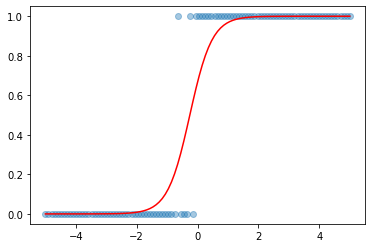

In [38]:
i = 0
max_iter = 5000
descent = numpy.ones(len(params))

while numpy.linalg.norm(descent) > 0.001 and i < max_iter:
    descent = gradient(params, logistic_model, x_data, y_data)
    params = params - descent * 0.01
    i += 1
    
print('Optimized value of w is {} vs. true value: 2'.format(params[0]))
print('Optimized value of b is {} vs. true value: 1'.format(params[1]))
print('Exited after {} iterations'.format(i))


pyplot.scatter(x_data, y_data, alpha=0.4)
pyplot.plot(x_data, logistic_model(params, x_data), '-r');

빨간 곡선이 우리의 모델이고 파랑점들이 실제 데이터입니다.

이제 기준값을 정하고 그것보다 크면 1, 작으면 0으로 분류하면 됩니다. 이번엔 0.5로 설정하겠습니다.

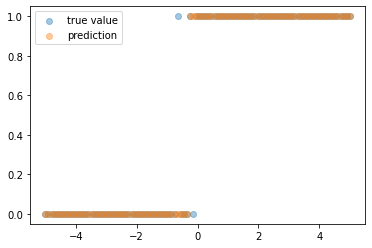

In [39]:
def decision_boundary(y):
    return 1 if y >= 0.5 else 0


def classify(preditcions):
    """
    Argument:
        prediction: an array of values between 0 and 1
    
    Returns:
        classified: an array of 0 and 1 values"""
        
    return decision_boundary(preditcions).flatten()


# 모든 점을 함수에 효율적으로 넣기 위해 vectorize 함수 사용(반복문은 오래 걸림)
decision_boundary = numpy.vectorize(decision_boundary)


pyplot.scatter(x_data, y_data, alpha=0.4, label='true value')
pyplot.scatter(x_data, classify(logistic_model(params, x_data)), alpha=0.4, label='prediction')
pyplot.legend();

거의 모든 데이터들을 정확하게 예측한 것을 볼 수 있습니다.

## 3.6 Multi-Class Classification

class가 세 가지 이상일 때, classification을 적용하는 방법은 크게 두 가지가 있다.


### One-vs-all(one-vs-rest)

임의의 것 하나와 다른 나머지 것에 대해 logistic regression을 모두 진행하는 방법이다. 밑의 그림을 보면 직관적으로 알 수 있다.

<img src="https://t1.daumcdn.net/cfile/tistory/262D0647578B05830C?download" height="500ptx" width="1000ptx">

$h_{\theta}^{(i)}(x)$는 $i$일 확률입니다. 각 $i$에 대해 확률이 나오고 그 중, 가장 큰 확률을 가진 $i$로 예측합니다.

### Softmax function

k차원의 벡터에서 $i$번째 원소를 $z_i$, $i$번째 클래스가 정답일 확률을 $p_i$로 나타낸다고 할 때, 소프트맥스 함수는 $p_i$를 다음과 같이 정의합니다.

$$p_i={e^{z_i}\over \sum_{j=1}^k e^{z_j}} \; for\;1,2,\cdots,k$$

3차원 문제를 예시로 들면 k = 3이므로 3차원 벡터 $z=[z_1,z_2,z_3]$의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴합니다.

$$softmax(z) = \Big[ {e^{z_1}\over \sum_{j=1}^3 e^{z_j}} {e^{z_2}\over \sum_{j=1}^3 e^{z_j}} {e^{z_3}\over \sum_{j=1}^3 e^{z_j}} \Big] = [p_1, p_2, p_3] = \hat{y} = 예측값$$

$p_1, p_2, p_3$ 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 0과 1 사이의 값으로 총합은 1이 된다.


# **4. Regularization**

## 4.1 The problem of overfitting & underfitting

feature가 너무 많으면 $J(\theta) \approx 0$으로 학습은 매우 잘 되지만 generalization이 되지 않습니다. 그렇기에 실제 데이터에 대한 예측값이 맞지 않습니다.

<img src="https://miro.medium.com/max/1266/1*_7OPgojau8hkiPUiHoGK_w.png" height="300px" width="800px">

<img src="https://miro.medium.com/max/1500/1*UCd6KrmBxpzUpWt3bnoKEA.png" height="300px" width="800px">

첫번째 사진은 linear regression, 두번째 사진은 logistic regression의 경우입니다.

이러한 overfitting을 해결하기 위해선 1) feature를 줄이고 2) regularization을 해주어야 합니다.

Regularization을 보기 전에 overfitting과 underfitting에 대해 더 살펴보겠습니다.



### Bias & Variance
Overfitting과 Underfitting을 알아보기 전에 먼저 Bias, Variance를 먼저 알아봅시다.

<img src="https://lh3.googleusercontent.com/rq_iMVSuIK1K4ykF9RQnF05hH6xxWm3lmNPWuQ3hfK9r4-3GBIuCxCW3L7QH53M3EIwbVWOcaRiRLDc0AIJ-0uq8-qzavpSWPceQ1lchq-ZPF16l3KLst24-x6MbGYFqQbEJmEI3gEc
" width="500" height="400" />

위 사진을 보면 쉽게 알 수 있습니다. Variance가 높으면 예측값들이 밀집해서 나오게 된다. 반대로 낮으면 예측값들이 흩뿌려져서 나오게 된다. Bias는 높으면 데이터가 전체적으로 중심을 잡지 못하고 낮으면 데이터의 중심을 잡을 수 있다.



### Underfitting
직선이 너무 간단한 경우 데이터가 흩뿌려져 있을 때는 그 데이터를 잘 설명하지 못합니다. 이것을 **Underfitting**되었다고 합니다. Underfitting에선 예측값이 high bias, low variance이기 때문에 좌측하단 그림에 해당합니다.



### Overfitting
모델이 너무 복잡한 경우입니다. 모든 training point를 지나게 되기에 training set에 대하여 loss는 아주 낮습니다. 그러나 새로운 데이터가 들어오면 training data와 비슷한 유형이여도 예측값은 실제값과 큰 차이를 가지게 된다. 이것을 **Overfitting**이라고 합니다. Overfitting에선 high variance, low bias이기 때문에 위 그렘에서 우측상단 그림에 해당합니다.

## 4.2 Regularization

Regularization은 overfitting을 막는 방법입니다. 먼저 우리의 기존 모델은 다음과 같습니다.

$$\hat{y} = w_0 + w_1x + w_2x^2 + \cdots + w_dx_d$$

차수를 가진 항들이 모델을 복잡하게 만듭니다. 그래서 계수값에 제한 조건을 추가합니다. 보편적인 방법은 regularization term인 $\lambda \sum_{j=1}^d w_j^2$를 추가하는 것입니다. mean squared error를 사용한 cost function에 추가하면 다음과 같습니다. 

$$L(w) = \frac{1}{N} \lVert \mathbf{y} - \mathbf{Xw} \rVert^2 + \lambda \sum_{j=1}^d w_j^2$$

새롭게 만든 cost function은 계수가 커지면 두번째 항도 커지게 되어 cost가 커집니다. 그렇기에 계수들이 커질수록 값을 억누르게 됩니다.

위 식에서 $\lambda$는 regularization parameter입니다. $\lambda$는 우리가 얼마나 큰 제약을 줄 것인지 결정하게 됩니다. $\lambda$가 큰 값을 가질수록 더 억누르게 됩니다. 

이때, $w_0$은 regression term에 포함되지 않습니다. 왜냐하면 $w_0$은 y절편으로 이것까지 억누르면 0차항이 되어버리기 때문입니다.

그렇다면 regularization은 언제 사용해야 할까요? 즉, overfitting과 underfitting은 어떤 기준으로 구분할까요? 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVNGxb%2FbtqAv1XfTgH%2FjhebgUTjr5SCYgGSu62NRK%2Fimg.png">

위의 그림을 보면 training loss는 계수를 늘릴수록, $\lambda$를 줄일수록 줄어드는 것을 확인할 수 있습니다. 그러나 test loss는 어느 순간에 가장 낮고 다시 위로 치솟는 convex 형태를 띄고 있습니다. 이때 기울기가 0이 되는 가장 작은 loss를 가진 곳을 적당한 곳으로 봅니다. 즉, 위 그림처럼 적당한 지점을 기준으로 오른쪽은 overfitting, 왼쪽은 underfitting이 됩니다.

## 4.3 Gradient Descent in Regularization


그렇다면 regularization term이 추가됐을 때, gradient descent는 어떻게 작동할까요? 

먼저 regularization term이 추가된 cost function을 가져옵니다. 

$$ L(w) = \frac{1}{N} \lVert \mathbf{y} - \mathbf{Xw} \rVert^2 + \lambda \sum_{j=1}^d w_j^2$$

위 식에서 행렬 원소를 풀어서 쓴다면 다음과 같이 쓸 수 있습니다.

$$ L(w) = \frac{1}{N} \Big[ \sum_{i=1}^N (h_{w}x^{(i)} - y^{(i)}) + \lambda \sum_{j=1}^d w_j^2 \Big] $$

이때, 앞부분은 이미 미분을 해봤고 뒤에 regularization term은 $x^2$ 꼴의 합을 미분하는 것과 같습니다. 그렇기에 gradient descent 식은 다음과 같이 나옵니다.

$$ w_j := w_j - \alpha \sum_{i=1}^N (h_{w}x^{(i)} - y^{(i)}) + 2\lambda \sum_{j=1}^d w_j $$

이때 편미분된 regularization term은 앞서 편미분했던 term(위 식에서 두번째)과 항상 부호가 반대입니다. 그렇기에 억제할 수 있습니다. 또한 regularization term에 제곱형태를 넣는 것을 **L2 Regularization**이라고 합니다. 그리고 linear regression에서 L2 regularization을 사용하는 것을 **Ridge Regression**이라고 합니다.


만약 regularization term에 제곱이 아닌 절댓값을 넣는다면 cost function과 gradient descent 식은 다음과 같이 나옵니다. 

$$ L(w) = \frac{1}{N} \Big[ \sum_{i=1}^N (h_{w}x^{(i)} - y^{(i)}) + \lambda \sum_{j=1}^d \lVert w_j  \rVert \Big] $$
$$ w_j := w_j - \alpha \sum_{i=1}^N (h_{w}x^{(i)} - y^{(i)}) + d\lambda $$

왜냐하면 절댓값은 1차이기에 앞에 $\lambda$만 남기 때문입니다. 이러한 regularization 방식을 **L1 Regularization**이라고 합니다. 그리고 linear regression에서 L1 regularization을 사용하는 것을 **Lasso Regression**이라고 합니다.

두 방식은 조금의 차이가 있습니다. 먼저 L1 regularization 방식은 $w_j$의 크기와 상관없이 동일한 크기로 억누릅니다. 그렇기에 $w_j$가 계속 작아지면 0으로 만듭니다.

L2 regularization 방식은 $w_j$ 크기와 비례하여 억누릅니다. 그렇기에 $w_j$가 크면 더 억누르고 작으면 덜 억누릅니다. 그렇기에 $w_j$가 아무리 작아져도 0에 수렴할뿐, 0이 되지 않습니다.

간단하게 표로 특징을 나타내면 다음과 같습니다.

||L1 regularization|L2 regularization|L1 + L2|
|-|-|-|-|
|변수선택|불가능|가능|가능|
|solution|closed form|명시해 없음|명시해 없음|
|특징1|변수간 상관관계가 높아도 좋은 성능|변수간 상관관계가 높으면 성능 $\downarrow$|변수간 상관관계를 반영한 정규화|
|특징2|크기가 큰 변수를 우선적으로 줄임|비중요 변수를 우선적으로 줄임|상관관계가 큰 변수를 동시에 선택/배제|


## 실습. Polynomial Regression & Regularization

### 1) Polynomial Regression을 이용하여 데이터 생성

$y = x_4 + x_3 - 4x_2$이란 polynomial function을 이용해서 데이터를 생성해보도록 하겠습니다. 이전 실습처럼 noise를 추가해서 생성하도록 하겠습니다.

In [2]:
from matplotlib import pyplot
from autograd import grad
from autograd import numpy

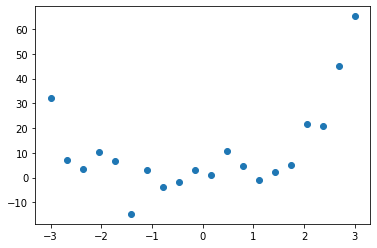

In [3]:
numpy.random.seed(0)
x = numpy.linspace(-3, 3, 20)
y = x**4 + x**3 - 4 * x**2 + 8 * numpy.random.normal(size=len(x))
pyplot.scatter(x, y);

우리가 생성한 데이터는 곡선의 형태이기에 직선으로 표현하는데 무리가 있습니다. 그래서 우리는 polynomial function을 사용해서 표현하도록 하겠습니다. 먼저 $d$차 곡선을 정의해보겠습니다. 

$$\hat{y} = w_0 + w_1x + w_2x^2 + \cdots + w_dx^d$$

$w$는 우리가 찾아야 할 계수들입니다. 그리고 우리의 목적은 주어진 $x, y$를 가장 잘 설명해주는 $w$를 찾는 것입니다. 

이제 위 식을 조금 변형하여 linear regression 문제처럼 바꾸겠습니다. $x_i=x^i$라고 정의하면 위 식은 다음과 같이 나타낼 수 있습니다.

$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_dx_d$$

이제 polynomial regression 문제가 multiple linear regression 문제와 동일해졌습니다. 이 역시 행렬의 형태로 나타낼 수 있습니다.

$$\hat{y} = \begin{bmatrix}\hat{y}^{(1)} \\ \hat{y}^{(2)} \\ \cdots \\ \hat{y}^{(N)} \end{bmatrix}
= \begin{bmatrix} \hat{x}_0^{(1)} & \hat{x}_1^{(1)} & \cdots & \hat{x}_d^{(1)} \\
\hat{x}_0^{(2)} & \hat{x}_1^{(2)} & \cdots & \hat{x}_d^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
\hat{x}_0^{(N)} & \hat{x}_1^{(N)} & \cdots & \hat{x}_d^{(N)} \end{bmatrix}
\begin{bmatrix}w_0 \\ w_1 \\ \vdots \\ w_d \end{bmatrix}
=\mathbf{Xw}$$

이번 실습은 3차항까지 고려하여 실습을 진행하겠습니다.

In [4]:
degree = 3
def polynomial_features(x, degree):
    """Generate polynomial features for x"""
    X = numpy.empty((len(x), degree + 1))
    for i in range(degree + 1):
        X[:, i] = x**i
    return X

X = polynomial_features(x, degree)
print(X.shape)

(20, 4)


### 2) Scale the data & Train the model

이제 입력 변수들을 정규화시키고 학습을 진행해보도록 하겠습니다. 이번에는 scikit-learn 패키지 안에 있는 MinMaxScaler를 사용하겠습니다.

In [5]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled[:, 0] = 1 # the column for intercept


def linear_regression(params, X):
    """
    The linear regression model in matrix from.
    Arguments:
        params: 1D array of weights for the linear model
        X     : 2D array of input values
    Returns:
        1D array of predicted values
    """
    
    return numpy.dot(X, params)


def mse_loss(params, model, X, y):
    """ The mean squared error loss function
    
    Args:
        params: 1D array of weights for the linear model
        model : function for the linear regression model
        X     : 2D array of input values
        y     : 1D array of predicted values
    Returns:
        float, mean squared error
    """
    y_pred = model(params, X)
    return numpy.mean(numpy.sum((y - y_pred)**2))


gradient = grad(mse_loss)

max_iter = 3000
alpha = 0.01
params = numpy.zeros(X_scaled.shape[1])
descent = numpy.ones(X_scaled.shape[1])
i = 0

from sklearn.metrics import mean_absolute_error

while numpy.linalg.norm(descent) > 0.01 and i <= max_iter:
    descent = gradient(params, linear_regression, X_scaled, y)
    params = params - descent * alpha
    loss = mse_loss(params, linear_regression, X_scaled, y)
    mae = mean_absolute_error(y, X_scaled@params)
    
    if i % 100 == 0:
        print(f"iteration {i}, loss = {loss}, mae = {mae}")
    i += 1


iteration 0, loss = 5434.767518111348, mae = 11.05718775676392
iteration 100, loss = 1300.476847978767, mae = 6.885099348931474
iteration 200, loss = 1281.308959359777, mae = 6.863905338971364
iteration 300, loss = 1272.989696502466, mae = 6.807943451695349
iteration 400, loss = 1267.4477500708404, mae = 6.760476747247461
iteration 500, loss = 1263.7497451381246, mae = 6.721622404779564
iteration 600, loss = 1261.2821441357041, mae = 6.689879731162117
iteration 700, loss = 1259.6355657998567, mae = 6.663949878547804
iteration 800, loss = 1258.5368386500604, mae = 6.642768513961068
iteration 900, loss = 1257.8036810933152, mae = 6.625466061127554
iteration 1000, loss = 1257.3144604500353, mae = 6.611332180986305
iteration 1100, loss = 1256.988013787092, mae = 6.5997866175015245
iteration 1200, loss = 1256.7701827834119, mae = 6.5903553760560865
iteration 1300, loss = 1256.6248287285202, mae = 6.582651263968432
iteration 1400, loss = 1256.5278370197354, mae = 6.576357994582585
iteration 

이제 학습된 parameter들을 보겠습니다.

In [6]:
params

array([-22.51573787,   6.7592435 ,  41.30788734,  30.01067976])

원래 데이터와 함께 그래프로 표현해보겠습니다.

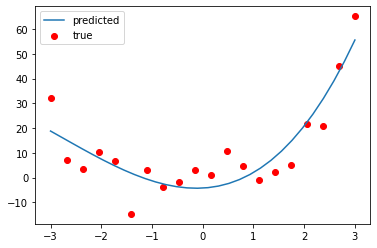

In [7]:
xgrid = numpy.linspace(x.min(), x.max(), 30)
Xgrid_poly_feat = polynomial_features(xgrid, degree)
Xgrid_scaled = min_max_scaler.transform(Xgrid_poly_feat)
Xgrid_scaled[:, 0] = 1

pyplot.scatter(x, y, c='r', label='true')
pyplot.plot(xgrid, Xgrid_scaled@params, label='predicted')
pyplot.legend();

In [8]:
from _util.plot_helpers import interact_polyreg

max_degree = 15
interact_polyreg(max_degree, x, y)

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Output()), _dom_classes=('widge…

### 3) Regularization

앞서 구한 L2 regularization의 식은 아래와 같습니다.

$$L(\mathbf{w}) = \frac{1}{N} \lVert \mathbf{y} - \mathbf{Xw} \rVert^2 + \lambda \sum_{j=1}^d w_j^2$$

이번 실습에선 위 식을 이용하여 regularization 해보겠습니다. $\lambda$는 1로 설정하겠습니다.

In [9]:
def regularized_loss(params, model, X, y, _lambda=1.0):
    """
    The mean squared error loss function with an L2 penalty.

    Args:
        params : 1D array of weights for the linear model
        model  : function for the linear regression model
        X      : 2D array of input values
        y      : 1D array of predicted values
        _lambda: regularization parameter, default 1.0

    Returns:
        float, regularized mean squared error
    """
    y_pred = model(params, X)
    return numpy.mean(numpy.sum((y - y_pred)**2)) + _lambda * numpy.sum(params[1:]**2)


gradient = grad(regularized_loss)

In [10]:
no_regularization_params = params.copy()

In [11]:
max_iter = 3000
alpha = 0.01
params = numpy.zeros(X_scaled.shape[1])
descent = numpy.ones(X_scaled.shape[1])
i = 0

from sklearn.metrics import mean_absolute_error

while numpy.linalg.norm(descent) > 0.01 and i <= max_iter:
    descent = gradient(params, linear_regression, X_scaled, y)
    params = params - descent * alpha
    loss = mse_loss(params, linear_regression, X_scaled, y)
    mae = mean_absolute_error(y, X_scaled@params)
    
    if i % 100 == 0:
        print("iteration {}, loss = {}, mae = {}".format(i, loss, mae))
    i += 1

iteration 0, loss = 5434.767518111348, mae = 11.05718775676392
iteration 100, loss = 1785.9852202374186, mae = 6.983886996350374
iteration 200, loss = 1764.2597057711023, mae = 6.966518785947395
iteration 300, loss = 1763.5702631188328, mae = 6.965728405272657


이제 regularization을 추가한 것과 추가하지 않은 것을 비교해보겠습니다.

weights without regularization
[-22.51573787   6.7592435   41.30788734  30.01067976]
weights with regularization
[-11.13750882  12.48522096  28.26626633  11.09211867]


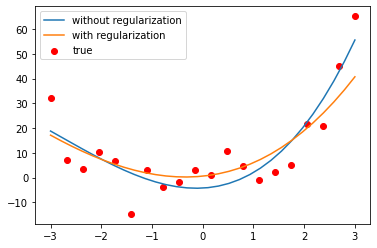

In [13]:
print("weights without regularization")
print(no_regularization_params)
print("weights with regularization")
print(params)

pyplot.scatter(x, y, c='r', label='true')
pyplot.plot(xgrid, Xgrid_scaled@no_regularization_params, label='without regularization')
pyplot.plot(xgrid, Xgrid_scaled@params, label='with regularization')
pyplot.legend();

더 다양한 차수에서 regularization을 비교해 보겠습니다.

In [14]:
interact_polyreg(max_degree, x, y, regularized=True)

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Output()), _dom_classes=('widge…

Degree가 커질수록 regularization의 중요성이 들어나게 됩니다. 높은 차수에서 예측 모델이 이리저리 움직이는 모습이 아닌 부드럽게 학습 데이터들을 지나가는 모습을 볼 수 있습니다. 이제 새롭게 들어오는 데이터도 잘 예측할 수 있습니다.

# **5. Cross Validation**

우리가 가진 데이터가 100개가 있을 때, 이를 test dataset과 training dataset으로 나눠야 한다. 이때 training data와 test data를 딱 정해두지 않고 첫번째는 i번째 데이터가, 다음에는 j번째 데이터가...식으로 training data와 test data를 교차하여 갖는 것을 cross validation이라고 한다.

<img src = "https://media.vlpt.us/images/jiselectric/post/4231f879-9ea9-4400-af0a-e5b2f3cced0c/cross-validation.png" height = "400px" width = "700px">


## 5.1 Cross Validation
### Leave-One-Out Cross Validation(LOO CV)
LOO CV는 하나의 데이터를 test data, 나머지 데이터를 training data로 사용하는 것이다. 만약 100개의 데이터가 있다면 100번째 데이터를 test로 설정하고 1~99는 training data로 설정하여 학습한다. 그리고 다음번엔 99번을 test data로 설정하고 1~98, 100은 training data로 설정한다. 이렇게 모든 데이터가 한 번은 test data가 되는 방식이다. 

방식에서 알 수 있듯이 속도가 느리다. 그러나 전체 데이터를 한 번씩 test data로 사용하기에 성능은 일반적으로 더 좋다. 

### K-fold CV
K-fold CV는 데이터를 k등분하여 한 덩어리를 test data, 나머지 덩어리들을 training data로 사용하는 방식이다. LOO CV보다 성능은 좀 떨어질 수 있으나 속도가 빠르다. 

## 5.2 Training, Validation and Test datasets
우리가 모델을 학습할 때, dataset을 3개로 나누어 사용한다. training과 validation은 학습용, test는 검증용이다. 이때 training과 test는 우리가 앞서 보았던 것과 같다. validation은 training으로 진행되고 있는 학습이 잘 진행되고 있는지 확인하는 용도이다. 다른 말로 validation은 $\lambda$값을 결정하는 용도이다. 한마디로 validation은 공부와 수능 사이의 모의고사와 같다.

## 실습. Multiple Logistic Regression

제조업 분야에선 물품의 상태를 판별하는데 컴퓨터 비전을 많이 사용합니다. 물품의 사진으로 우리가 학습한 모델이 결함이 있는지 판단합니다. 이를 multiple logistic regression으로 진행하겠습니다.

### 1) Images of metal-casting parts
먼저 간단한 실험을 하기 위해 이미즐 흑백으로 변환하고 개수를 적게 진행하겠습니다.

In [1]:
from autograd import numpy
from autograd import grad
from matplotlib import pyplot

In [2]:
from urllib.request import urlretrieve
URL = 'https://github.com/engineersCode/EngComp6_deeplearning/raw/master/data/casting_images.npz'
urlretrieve(URL, 'data/casting_images.npz')

('data/casting_images.npz', <http.client.HTTPMessage at 0x2ba5704ac10>)

In [3]:
# read in images and labels
with numpy.load("data/casting_images.npz", allow_pickle=True) as data:
    ok_images = data['ok_images']
    def_images = data["def_images"]

In [4]:
type(ok_images)

numpy.ndarray

In [5]:
ok_images.shape

(519, 16384)

우리의 전체 데이터 개수는 519개입니다.

또한 원래 데이터는 128 x 128 사이즈의 이미지 데이터입니다. 그런데 우리는 이를 하나로 쭉 펴서 다룰 것이기에 16384가 되었습니다. 

이제 데이터셋이 어떻게 구성되어있는지 자세히 알아보겠습니다.

In [6]:
n_ok_total = ok_images.shape[0]
res = int(numpy.sqrt(def_images.shape[1]))

print("Number of images without defects:", n_ok_total)
print("Image resolution: {} by {}".format(res, res))

Number of images without defects: 519
Image resolution: 128 by 128


In [7]:
n_def_total = def_images.shape[0]
print("Number of images with defects:", n_def_total)

Number of images with defects: 781


결함이 없는 이미지 519개, 결함이 있는 이미지는 718개입니다. 이제 pyplot을 통해 이미지를 보겠습니다.

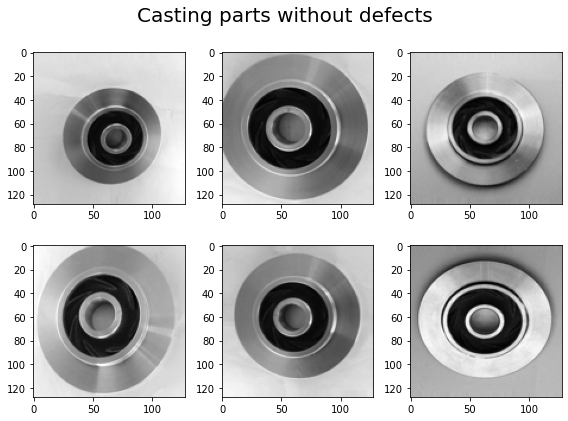

In [8]:
fig, axes = pyplot.subplots(2, 3, figsize=(8, 6), tight_layout=True)
axes[0, 0].imshow(ok_images[0].reshape((res, res)), cmap="gray")
axes[0, 1].imshow(ok_images[50].reshape((res, res)), cmap="gray")
axes[0, 2].imshow(ok_images[100].reshape((res, res)), cmap="gray")
axes[1, 0].imshow(ok_images[150].reshape((res, res)), cmap="gray")
axes[1, 1].imshow(ok_images[200].reshape((res, res)), cmap="gray")
axes[1, 2].imshow(ok_images[250].reshape((res, res)), cmap="gray")
fig.suptitle("Casting parts without defects", fontsize=20);

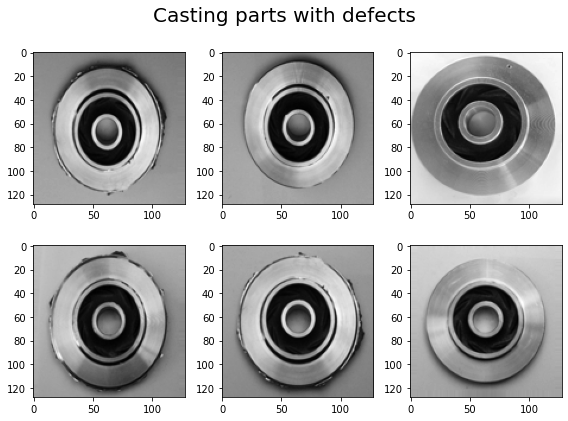

In [9]:
fig, axes = pyplot.subplots(2, 3, figsize=(8, 6), tight_layout=True)
axes[0, 0].imshow(def_images[0].reshape((res, res)), cmap="gray")
axes[0, 1].imshow(def_images[50].reshape((res, res)), cmap="gray")
axes[0, 2].imshow(def_images[100].reshape((res, res)), cmap="gray")
axes[1, 0].imshow(def_images[150].reshape((res, res)), cmap="gray")
axes[1, 1].imshow(def_images[200].reshape((res, res)), cmap="gray")
axes[1, 2].imshow(def_images[250].reshape((res, res)), cmap="gray")
fig.suptitle("Casting parts with defects", fontsize=20);

### 2) Multiple logistic regression
지난번 배운 logistic regression에서 입력 변수가 여러개인 경우가 우리의 상황입니다. 이를 수식을 통해 알아보면 다음과 같습니다.

$$\hat{y}^{(1)} = \text{logistic}(b + w_1x_1^{(1)}+ w_2x_2^{(1)} + ... + w_nx_n^{(1)})$$
$$\hat{y}^{(2)} = \text{logistic}(b + w_1x_1^{(2)}+ w_2x_2^{(2)} + ... + w_nx_n^{(2)})$$
$$\vdots$$
$$\hat{y}^{(N)} = \text{logistic}(b + w_1x_1^{(N)}+ w_2x_2^{(N)} + ... + w_nx_n^{(N)})$$

위 식에서 $(1), (2), ... (N)$은 $N$개의 이미지가 있다는 것입니다. $\hat{y}$는 예측한 확률 값입니다. 

위의 수식들을 행렬의 형태로 바꾸면 다음과 같이 바꿀 수 있습니다. 

$$
\begin{bmatrix}
\hat{y}^{(1)} \\
\vdots        \\
\hat{y}^{(N)}
\end{bmatrix} 
= 
\text{logistic} \left(
\begin{bmatrix}
b             \\
\vdots        \\
b
\end{bmatrix}
+
\begin{bmatrix}
x_1^{(1)} & \cdots & x_n^{(1)} \\
\vdots    & \ddots & \vdots    \\
x_1^{(N)} & \cdots & x_n^{(N)} 
\end{bmatrix}
\begin{bmatrix}
w_1             \\
\vdots        \\
w_n
\end{bmatrix}
\right)
$$

$$\hat{\mathbf{y}} = \text{logistic}(\mathbf{b} + \mathbf{X} \mathbf{w})$$

이제 코드를 통해서 알아보겠습니다. 


In [10]:
def logistic(x):
    """Logistic/sigmoid function.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input to the logistic function.
    
    Returns
    -------
    numpy.ndarray
        The output.
        
    Notes
    -----
    The function does not restrict the shape of the input array. The output
    has the same shape as the input.
    """
    out = 1. / (1. + numpy.exp(-x))

    return out

In [11]:
def logistic_model(x, params):
    """A logistic regression model.
    
    A a logistic regression is y = sigmoid(x * w + b), where the operator *
    denotes a mat-vec multiplication.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    params : a tuple/list of two elemets
        The first element is a 1D array with shape (n_total_pixels). The
        second element is a scalar (the intercept)

    Returns
    -------
    probabilities : numpy.ndarray
        The output is a 1D array with length n_samples.
    """

    out = logistic(numpy.dot(x, params[0]) + params[1])

    return out

이제 cost function을 만들겠습니다. Logistic regression 실습 시간에 배운 cost function을 사용하고, 16384개의 많은 feature들을 가지고 있기 때문에 4챕터에서 배울 regularization term을 추가하도록 하겠습니다.

$$\text{cost function} = -\sum_{i=1}^N \Big[ y_{\text{true}}^{(i)} \log\left(\hat{y}^{(i)}\right) + \left( 1- y_{\text{true}}^{(i)}\right) \log\left(1-\hat{y}^{(i)}\right)\Big] + \lambda \sum_{i=1}^n w_i^2 $$

이것을 벡터꼴로 나타내면 다음과 같습니다. 

$$\text{cost function} = - [\mathbf{y}_{\text{true}}\log\left(\mathbf{\hat{y}}\right) + \left( \mathbf{1}- \mathbf{y}_{\text{true}}\right) \log\left(\mathbf{1}-\mathbf{\hat{y}}\right)] + \lambda \sum_{i=1}^n w_i^2 $$

여기서 $\mathbf{1}$는 1로 이루어진 벡터입니다. 

이것을 코드로 옮겨보겠습니다. 

In [12]:
def model_loss(x, true_labels, params, _lambda=1.0):
    """Calculate the predictions and the loss w.r.t. the true values.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    true_labels : numpy.ndarray
        The true labels of the input images. Should be 1D and have length of
        n_images.
    params : a tuple/list of two elements
        The first element is a 1D array with shape (n_total_pixels). The
        second elenment is a scalar.
    _lambda : float
        The weight of the regularization term. Default: 1.0
    
    Returns
    -------
    loss : a scalar
        The summed loss.
    """
    pred = logistic_model(x, params)
    
    loss = - (
        numpy.dot(true_labels, numpy.log(pred+1e-15)) +
        numpy.dot(1.-true_labels, numpy.log(1.-pred+1e-15))
    ) + _lambda * numpy.sum(params[0]**2)
    
    return loss

### 3) Training, validation and test dataset

우리는 데이터 셋을 3종류로 나누도록 하겠습니다. training 60%, validation 20%, test 20%로 나누겠습니다.

In [13]:
# numbers of images for validation (~ 20%)
n_ok_val = int(n_ok_total * 0.2)
n_def_val = int(n_def_total * 0.2)
print("Number of images without defects in validation dataset:", n_ok_val)
print("Number of images with defects in validation dataset:", n_def_val)

# numbers of images for test (~ 20%)
n_ok_test = int(n_ok_total * 0.2)
n_def_test = int(n_def_total * 0.2)
print("Number of images without defects in test dataset:", n_ok_test)
print("Number of images with defects in test dataset:", n_def_test)

# remaining images for training (~ 60%)
n_ok_train = n_ok_total - n_ok_val - n_ok_test
n_def_train = n_def_total - n_def_val - n_def_test
print("Number of images without defects in training dataset:", n_ok_train)
print("Number of images with defects in training dataset:", n_def_train)

Number of images without defects in validation dataset: 103
Number of images with defects in validation dataset: 156
Number of images without defects in test dataset: 103
Number of images with defects in test dataset: 156
Number of images without defects in training dataset: 313
Number of images with defects in training dataset: 469


이제 numpy 패키지 안에 split 함수로 나누어줍니다. 

In [14]:
ok_images = numpy.split(ok_images, [n_ok_val, n_ok_val+n_ok_test], 0)
def_images = numpy.split(def_images, [n_def_val, n_def_val+n_def_test], 0)

이제 numpy 패키지 안에 concatenate 함수를 이용해서 train, val, test끼리 결함이 있는 이미지와 없는 이미지들을 합쳐줍니다. 

In [15]:
images_val = numpy.concatenate([ok_images[0], def_images[0]], 0)
images_test = numpy.concatenate([ok_images[1], def_images[1]], 0)
images_train = numpy.concatenate([ok_images[2], def_images[2]], 0)

### 4) Data normalization: z-score normalization

지난 시간에 했던 것처럼 다양한 feature가 있으면 normalization을 해주어야 합니다. 이번에는 z-score normalization을 사용하겠습니다. 

$$z = \frac{x - \mu_\text{train}}{\sigma_\text{train}}$$

Train, validation, test 모두 진행해주겠습니다. 

In [16]:
# calculate mu and sigma
mu = numpy.mean(images_train, axis=0)
sigma = numpy.std(images_train, axis=0)

# normalize the training, validation, and test datasets
images_train = (images_train - mu) / sigma
images_val = (images_val - mu) / sigma
images_test = (images_test - mu) / sigma

### 5) Creating labels/classes

이제 데이터셋에 class label을 정해주어야 합니다. 이 이미지가 결함이 있는지 없는지 명시적으로 나타내주는 것입니다. 

결함이 있는 것을 1, 결함이 없는 것을 0으로 나타내어 주겠습니다. 

In [17]:
# labels for training data
labels_train = numpy.zeros(n_ok_train+n_def_train)
labels_train[n_ok_train:] = 1.

# labels for validation data
labels_val = numpy.zeros(n_ok_val+n_def_val)
labels_val[n_ok_val:] = 1.

# labels for test data
labels_test = numpy.zeros(n_ok_test+n_def_test)
labels_test[n_ok_test:] = 1.

이제 입력으로 들어온 이미지에 결함이 있는지 없는지 알아내기 위해 logistic model을 사용하겠습니다. 

지난 시간에 한 것처럼 출력 확률 값이 0.5보다 크면 결함이 있고, 0.5보다 작으면 결함이 없다고 하겠습니다. 

In [18]:
def classify(x, params):
    """Use a logistic model to label data with 0 or/and 1.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    params : a tuple/list of two elements
        The first element is a 1D array with shape (n_total_pixels). The
        second element is a scalar.
    
    Returns
    -------
    labels : numpy.ndarray
        The shape of the label is the same with `probability`.
    
    Notes
    -----
    This function only works with multiple images, i.e., x has a shape of
    (n_images, n_total_pixels).
    """
    probabilities = logistic_model(x, params)
    labels = (probabilities >= 0.5).astype(float)
    return labels

### 6) Evaluating model performance : F-score, Accuracy

이제 우리가 학습한 모델이 얼마나 잘 예측을 하는지 알아보도록 하겠습니다. 

우리가 예측한 것의 결과는 다음 4가지의 종류로 분류할 수 있습니다. 

1. True Positive(TP) : 결함이 있다고 예측한 것들 중 실제로 결함이 있는 것
2. False Positive(FP) : 결함이 있다고 예측한 것들 중 실제로 결함이 없는 것
3. True Negative(TN) : 결함이 없다고 예측한 것들 중 실제로 결함이 없는 것
4. False Negative(FN) : 결함이 없다고 예측한 것들 중 실제로 결함이 있는 것

|                     |결함이 있다고 예측  | 결함이 없다고 예측  |
|---                  |---                 |---                  |
|실제로 결함이 있음   | $$N_{TP}$$         |    $$N_{FN}$$       |
|실제로 결함이 없음   |   $$N_{FP}$$       |   $$N_{TN}$$        | 

위에서 $N$은 개수를 나타냅니다. 

이제 위에서 설명한 것들을 가지고 가장 보편적으로 사용하는 지표 3가지를 알아보도록 하겠습니다. 

$$\text{accuracy} = \frac{\text{정확하게 예측한 개수}}{\text{예측한 전체 개수}} \frac{N_{TP} + N_{TN}}{N_{TP}+N_{FN}+N_{FP}+N_{TN}}$$
$$\text{precision} = \frac{\text{결함이 있다고 정확하게 예측한 개수}}{\text{결함이 있다고 예측한 총 개수}} = \frac{N_{TP}}{N_{TP}+N_{FP}}$$
$$\text{recall} = \frac{\text{결함이 있다고 정확하게 예측한 개수}}{\text{실제로 결함이 있는 개수}} =\frac{N_{TP}}{N_{TP}+N_{FN}}$$

여기서 우리는 precision과 recall로 F-score을 계산할 수 있습니다. 

$$\text{F-score} = \frac{(1+\beta^2) \text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}$$

$\beta$는 precision과 recall중 어떤 것을 중점적으로 생각할지에 대한 저희가 정하는 상수입니다. 

이제 accuracy와 F-score을 구하는 것을 코드로 구현해보겠습니다. 

In [19]:
def performance(predictions, answers, beta=1.0):
    """Calculate precision, recall, and F-score.
    
    Arguments
    ---------
    predictions : numpy.ndarray of integers
        The predicted labels.
    answers : numpy.ndarray of integers
        The true labels.
    beta : float
        A coefficient representing the weight of recall.
    
    Returns
    -------
    precision, recall, score, accuracy : float
        Precision, recall, and F-score, accuracy respectively.
    """
    true_idx = (answers == 1)  # the location where the answers are 1
    false_idx = (answers == 0)  # the location where the answers are 0
    
    # true positive: answers are 1 and predictions are also 1
    n_tp = numpy.count_nonzero(predictions[true_idx] == 1)
    
    # false positive: answers are 0 but predictions are 1
    n_fp = numpy.count_nonzero(predictions[false_idx] == 1)
    
    # true negative: answers are 0 and predictions are also 0
    n_tn = numpy.count_nonzero(predictions[false_idx] == 0)
    
    # false negative: answers are 1 but predictions are 0
    n_fn = numpy.count_nonzero(predictions[true_idx] == 0)
    
    # precision, recall, and f-score
    precision = n_tp / (n_tp + n_fp)
    recall = n_tp / (n_tp + n_fn)
    score = (
        (1.0 + beta**2) * precision * recall / 
        (beta**2 * precision + recall)
    )

    accuracy = (n_tp + n_tn) / (n_tp + n_fn + n_fp + n_tn)

    return precision, recall, score, accuracy

두 개의 값이 모두 높을수록 학습이 잘된 것입니다.

### 7) Initialization
이제 우리가 학습할 parameter들을 초기화하겠습니다. 처음은 0으로 초기화해보겠습니다.

In [20]:
# a function to get the gradients of a logistic model
gradients = grad(model_loss, argnum=2)

# initialize parameters
w = numpy.zeros(images_train.shape[1], dtype=float)
b = 0.

학습 전, 후를 비교하기위해 학습 전에 test dataset에서 성능을 측정해보겠습니다.

In [21]:
# initial accuracy
pred_labels_test = classify(images_test, (w, b))
perf = performance(pred_labels_test, labels_test)

print("Initial precision: {:.1f}%".format(perf[0]*100))
print("Initial recall: {:.1f}%".format(perf[1]*100))
print("Initial F-score: {:.1f}%".format(perf[2]*100))
print("Initial Accuracy: {:.1f}%".format(perf[3]*100))

Initial precision: 60.2%
Initial recall: 100.0%
Initial F-score: 75.2%
Initial Accuracy: 60.2%


0으로 초기화 헀는데도 성능이 나쁘지 않습니다. 왜냐하면 전체를 다 0으로 초기화했다는 의미는 단순히 모든 것들이 다 결함이 있다고 예측을 한다는 의미기 때문입니다. 우리의 데이터에는 103개의 결함이 없는 부품과 156개의 결함이 있는 부품을 가지고 있기 때문에 성능이 괜찮아 보입니다. 

그렇기에 test와 validation set은 우리의 현실 데이터와 비슷해야 합니다. 실제 제조 공정에서 결함이 있는 부품들은 저렇게 많이 나오지 않기 때문에 이는 좋은 데이터라고 할 수 없습니다. 데이터셋을 구성하는 데에 그 해당 도메인에 대한 지식도 들어가야 합니다. 

하지만 우리는 실습을 진행하는 것이므로 그대로 진행하겠습니다.

### 7) Training / Optimization
이제 학습을 진행하겠습니다. 학습을 진행하는 동안 validation data로 얼마나 학습이 잘 진행되고 있는지 확인하겠습니다. 그리고 validation loss가 더이상 줄어들지 않는 부분에서 학습을 멈추도록 하겠습니다.

In [22]:
# learning rate
lr = 1e-5

# a variable for the change in validation loss
change = numpy.inf

# a counter for optimization iterations
i = 0

# a variable to store the validation loss from the previous iteration
old_val_loss = 1e-15

# keep running if:
#   1. we still see significant changes in validation loss
#   2. iteration counter < 10000
while change >= 1e-5 and i < 10000:
    
    # calculate gradients and use gradient descents
    grads = gradients(images_train, labels_train, (w, b))
    w -= (grads[0] * lr)
    b -= (grads[1] * lr)
    
    # validation loss
    val_loss = model_loss(images_val, labels_val, (w, b))
    
    # calculate f-scores against the validation dataset
    pred_labels_val = classify(images_val, (w, b))
    score = performance(pred_labels_val, labels_val)

    # calculate the chage in validation loss
    change = numpy.abs((val_loss-old_val_loss)/old_val_loss)

    # update the counter and old_val_loss
    i += 1
    old_val_loss = val_loss
    
    # print the progress every 10 steps
    if i % 10 == 0:
        print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

10...20...30...40...50...60...70...80...90...100...110...120...130...140...150...160...170...180...190...200...210...220...230...240...250...260...270...280...290...300...310...320...330...340...350...360...370...380...390...400...410...420...430...440...450...460...470...480...490...500...510...520...530...540...

Upon optimization stopped:
    Iterations: 541
    Validation loss: 126.77545136024064
    Validation precision: 0.900709219858156
    Validation recall: 0.8141025641025641
    Validation F-score: 0.8552188552188552
    Validation Accuracy: 0.833976833976834
    Change in validation loss: 2.1137958844584294e-06


최종 성능은 test data로 측정해야합니다. 

In [23]:
# final accuracy
pred_labels_test = classify(images_test, (w, b))
perf = performance(pred_labels_test, labels_test)

print("Final precision: {:.1f}%".format(perf[0]*100))
print("Final recall: {:.1f}%".format(perf[1]*100))
print("Final F-score: {:.1f}%".format(perf[2]*100))
print("Final Accuracy: {:.1f}%".format(perf[3]*100))

Final precision: 88.0%
Final recall: 84.6%
Final F-score: 86.3%
Final Accuracy: 83.8%


F-score는 75.2%에서 86.3%, accuracy는 60.2%에서 83.8% 로 많이 증가하였습니다.

# **6. Dimension Reduction**

Dimension reduction이란 말 그대로 차원을 줄이는 것을 의미한다. 즉, 데이터의 개수는 유지하고 feature의 수를 줄이는 것이다. 이 과정을 진행하는 이유는 우선 용량을 줄이고 계산의 속도를 빠르게 할 수 있다는 장접이 있다. 그리고 모델 학습을 방해하는 feature를 제외하여 성능을 더 올리고 noise는 더 줄일 수 있습니다.

Dimension Reduction을 하는 방법은 크게 두 가지로 나눌 수 있습니다.

## 6.1 Feature Selection
첫 번째 방법은 feature를 선택하고 나머지는 제거하는 방식으로 dimension을 줄이는 것입니다. feature selection은 또 다시 두 가지 방법으로 나눌 수 있습니다.


### Forward Selection
Forward selection은 하나씩 선택하는 방법입니다. 방법은 간단합니다. 모든 feature에 대하여 학습을 하고 가장 성능이 높은 feature를 첫 번째 feature로 고정합니다. 그리고 두 번째 feature 자리에 나머지 feature들을 넣어 학습하며 가장 성능이 높은 feature를 두 번째 feature에 고정합니다. 이것을 성능이 떨어지기 전까지 반복합니다.

### Backword Selection
Backword selection은 하나씩 제거하는 방법입니다. 전체 feature에서 하나씩 빼보면서 학습하고 가장 성능이 좋아지는 방법을 택합니다. 그리고 이를 반복하며 하나씩 제거해갑니다. Backword selection 역시 마찬가지로 성능이 떨어지기 전까지 반복합니다.

## 6.2 Feature Extraction

Feature extraction은 기존 feature들을 조합하여 새로운 feature들을 만드는 방법입니다. 이 역시 여러가지 방법이 있습니다.

### **Principal Component Analysis(PCA)**
PCA는 차원을 linear하게 줄일 수 있다. 

예를 들어 벡터 $A = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$를 백터 $B = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$을 이용하여 1차원으로 바꾼다고 해봅시다. 벡터 $B$ 방향으로 x'이란 축을 만듭니다. 그리고 벡터 $A$를 x'축 위로 orthogonal projection 시키면 1차원의 벡터가 하나 나옵니다. 이는 벡터의 내적으로도 구할 수 있습니다. 이때 $\theta$는 벡터 $A$와 x'축 사이의 각입니다.

$$\begin{bmatrix} 3 & 4 \end{bmatrix} \begin{bmatrix} 2 \\ 1 \end{bmatrix}
= \begin{bmatrix} 3 \\ 4 \end{bmatrix} \circ \begin{bmatrix} 2 \\ 1 \end{bmatrix}
= \sqrt{3^2 + 4^2}\sqrt{2^2 + 1^1} \cos{\theta}$$

그리고 위 식은 다음과 같이 변형할 수도 있습니다.

$$5cos\theta = \frac{\begin{bmatrix} 3 & 4 \end{bmatrix} \begin{bmatrix} 2 \\ 1 \end{bmatrix}}{\sqrt{2^2 + 1^1}}$$

이를 일반화시켜봅시다. 벡터 $A = \begin{bmatrix} a \\ b \end{bmatrix}$를 백터 $B = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$를 이용하여 식을 써보겠습니다.

$$ \frac{ax_1 + bx_2}{\sqrt{a^2 + b^2}} = \frac{a}{\sqrt{a^2 + b^2}}x_1 + \frac{b}{\sqrt{a^2 + b^2}}x_2$$

이는 벡터 $A$가 벡터 $B$로 인해 생긴 축 x'에 orthogonal projection할 때, x'축에서 좌표와 일치합니다. 이때, $\frac{a}{\sqrt{a^2 + b^2}} + \frac{b}{\sqrt{a^2 + b^2}} = 1$이 만족되어야 합니다.

그림으로 보면 아래와 같습니다.

<img src = "https://blog.kakaocdn.net/dn/btsi0E/btqLW9xNcWw/Ke5W0eur5XspzF0kLZk6Xk/img.png" height = "500px" width = "500px"> 

PCA의 목적은 데이터 간의 구분을 더욱 명확하게 하는데 있습니다. 그렇기에 data를 넓게 펼치기 위해서 data가 펴진 방향으로 축을 두고 그 좌표로 orthogonal projection하는 것입니다.


위의 상황보다 더 고차원인 Multi-dimensional PCA도 방법은 같습니다. 3차원으로 그려진 타구는 다음과 같이 그려집니다. 

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Ellipsoid-1-tab.svg/1920px-Ellipsoid-1-tab.svg.png" height = "500px" width = "700px">

장축을 축으로 하여 그 축과 수직인 축을 차례대로 찾으면 된다.

### **Multidimensional Scaling(MDS)**

MDS는 여러 벡터가 있을 때, 각각의 벡터의 거라와 줄인 차원에서 각각의 벡터 거리가 최대한 비슷하게 축소하는 방법입니다.

$$min \sum_{i < j}(\lVert x_i - x_j \rVert - \delta_{i,j})^2$$

위 식에서 $\lVert x_i - x_j \rVert$은 low-dim distance, $\delta_{i,j}$는 high-dim distance입니다. 이때 $\delta_{i,j}$가 주어져서 MDS를 실행하는 것을 Metric MDS라고 합니다. 그러나 값이 주어지지 않아도 각 거리의 대소구분만 주어져도 MDS를 실행할 수 있습니다. 이를 Nonmetric MDS라고 합니다. 

<img src = "https://miro.medium.com/max/700/1*_L-lQDveeR-ZrkPohWzLbA.png">

위 그림을 보면 $d_{12}, d_{13}, d_{23}$이 각각 정의되어 있다. 이때 실제 차원에서 $d_{12}, d_{13}, d_{23}$의 길이가 주어지면 Metric MDS, 정확한 수치로 나타낼 수 없고 거리의 대소 구분만 가능한 데이터라면 Nonmetric MDS이다.

### **Sammon's mapping**

위 그림의 예시에 대해 Metric MDS를 실행하면 다음과 같은 식이 쓰여집니다. 이때 $D_{12}, D_{13}, D_{23}$는 원래 차원에서 길이입니다.

$$(\lVert A - C \rVert - D_{13})^2 + (\lVert A - B \rVert - D_{12})^2 + (\lVert B - C \rVert - D_{23})^2$$

이때 상대적으로 원래 차원의 길이가 클수록 오차가 커지게 됩니다. 즉, 거리가 먼 것을 우선적으로 보존합니다. 그러나 거리가 짧은 것들이 서로 관계가 밀접한 것이며 우리는 이러한 관계 데이터가 필요할 때도 많이 있습니다. 그렇기에 각 값들에 대해 균등한 비중을 주기 위해 사용하는 방법이 **Sammon's mapping**입니다. 

$$\frac{1}{D_{13}}(\lVert A - C \rVert - D_{13})^2 + \frac{1}{D_{12}}(\lVert A - B \rVert - D_{12})^2 + \frac{1}{D_{23}}(\lVert B - C \rVert - D_{23})^2$$

원래의 값을 나눠줌으로 비중을 균등하게 만듭니다. 이를 좀더 일반적인 식으로 나타내면 다음과 같습니다. 이제 원래 차원의 길이를 $d_{ij}^*$이라고 하겠습니다.

$$E = \frac{1}{\sum_{i<j}d_{ij}^*}\sum_{i<j}\frac{(d_{ij}^* - d_{ij})^2}{d_{ij}^*}

### **Cos Similarity**
조금 다른 이야기를 해봅시다. 두 벡터가 어느정도 닮았는지 수치로 나타낼 때, 우리는 벡터의 내적을 사용합니다. 그 수치 중 Cos similarity 방법이 있습니다. 두 벡터 $A,B$의 cos similarity는 다음과 같이 구할 수 있습니다.

$$S(A, B) = \frac{A \cdot B}{\lVert A \rVert \lVert B \rVert} = cos\theta$$

즉, 두 벡터 사이의 각이 작을수록 유사도가 증가하고 각이 클수록 유사도는 감소합니다. 그리고 이렇게 구해진 유사도는 벡터의 크기, 두 벡터의 거리와 무관하게 각으로만 판단됩니다. 

그렇기에 cos 유사도를 MDS에 적용시키면 Sammon's mapping을 사용하지 않고도 서로 관계를 잘 보존할 수 있습니다. 

$$min \; \sum_{i < j} \Big( \frac{x_i \cdot x_j}{\lVert x_i \rVert \lVert x_j \rVert} - \frac{x_i^* \cdot x_j^*}{\lVert x_i^* \rVert \lVert x_j^* \rVert} \Big)^2$$

## 실습) Visualizing MNIST

### 1) MNIST

MNIST는 가장 간단한 이미지 데이터셋입니다. 28 x 28 pixel의 숫자 이미지로 구성되어있습니다. 실제로 데이터를 불러와서 확인해 보겠습니다. 

먼저 불러온 데이터를 이미지와 그 숫자가 무엇인지 알려주는 label로 나눠주겠습니다.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', cache=False)

In [61]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

임의의 이미지와 레이블을 불러오면 다음과 같습니다.

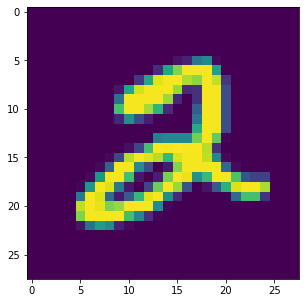

label : 2


In [102]:
plt.figure(figsize=(5,5))
idx = 5

grid_data = X.values[idx].reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none")
plt.show()

print('label : {}'.format(y[idx]))

각각의 이미지는 28 x 285 pixel들을 가지고 있기 때문에 우리는 28 x 28 = 784 차원의 벡터를 가지게 됩니다. 하지만 784차원의 공간에서 MNIST가 차지하는 공간은 매우 작을 것입니다. 784차원에는 매우 많은 벡터가 존재합니다. 랜덤하게 하나씩 뽑아 이미지로 나타내보면 다음과 같이 나타납니다.

<Figure size 432x288 with 0 Axes>

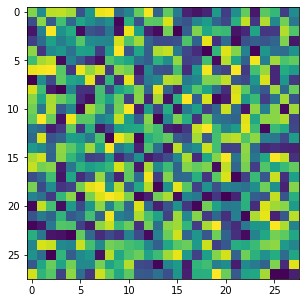

In [73]:
plt.clf()
plt.figure(figsize=(5,5))

rand_img = np.random.rand(28, 28)
plt.imshow(rand_img)

plt.show()

이렇게 수많은 이미지들 중에서 숫자를 나타내는 이미지는 매우 드물 것입니다. 그렇기에 차지하는 차원도 더 작습니다. 그래서 우리는 차원을 더욱 작게 하려는 노력을 할 것입니다. 이때 사용할 방법이 PCA입니다.

### 2) PCA using Scikit-Learn

먼저 42000개의 데이터는 개수가 너무 많기에 개수를 좀 줄여서 15000개를 가지고 진행하겠습니다.

In [74]:
labels = y[:15000]
data = X[:15000]

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


그리고 feature의 개수가 매우 많기에 z-score로 정규화 시킵니다. Sklearn 패키지 안에 있는 StandardScaler 함수를 사용하겠습니다.

In [78]:
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

sample_data = standardized_data

(15000, 784)


이제 scikit-learn 안의 PCA 패키지를 가져와 적용하겠습니다.

In [77]:
from sklearn import decomposition

pca = decomposition.PCA()

2차원으로 축소할 것이므로 number of components를 2로 합니다.

In [80]:
# configuring the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


원래 우리가 가지고 있던 784차원의 데이터가 PCA를 통해서 2차원으로 줄어든 것을 볼 수 있습니다. 이제 이것을 시각화해서 보도록하겠습니다. 라벨마다 색을 부여해서 시각화합니다.

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


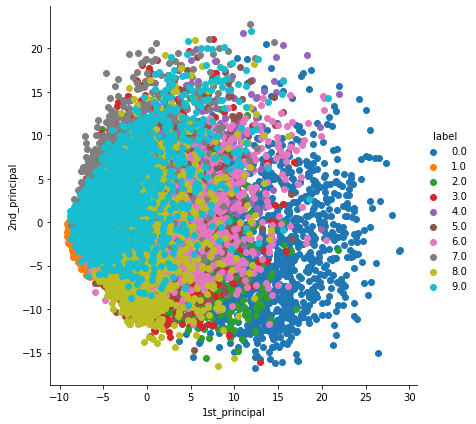

In [81]:
# attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, labels)).T

import seaborn as sn

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

이렇게 우리의 MNIST 데이터셋을 2D 차원으로 축소해서 시각화했습니다. 비슷한 라벨끼리 모였는 것을 보아 잘 축소된 것을 알 수 있습니다. 

### 3) Implement PCA

이제 직접 eigen vector를 구하고, 데이터들을 사영시키면서 차원 축소를 진행해보겠습니다. 

먼저, eigen value와 eigen vector를 구하기 위해서 공분산 행렬을 먼저 구해보도록 하겠습니다. 이때, 이미 z-score normalization을 해주었기 때문에 sample_data의 평균이 0입니다. 그렇기에 covariance matrix를 구하는 식이 다음과 같이 간단해집니다.

$$Cov(X, X) = E\Big( (X - \bar{X})(X - \bar{X})^T \Big) = E(XX^T)$$

여기서 $X$는 (차원 수 x 데이터 개수) 형태의 matrix이므로 우리의 예시에선 transpose시켜서 진행하겠습니다.

In [82]:
# find the co-variance matrix which is : A.T * A
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)
print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [84]:
sample_data.mean()

7.635882e-10

이제 구한 공분산 행렬을 가지고, scipy 패키지 안의 eigh 함수를 통해서 eigen value와 eigen vector를 구하도록 하겠습니다. 

우리는 2D로 차원을 축소할 것이기에 가장 큰 두 개의 값을 선정해서 구해보도록 하겠습니다.

In [85]:
# finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2D space

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to heigh value)
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
# eigval이 784개 중 가장 큰 2개
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


이제 구한 eigen vector를 축으로 우리의 데이터를 사영시키도록 하겠습니다.

In [87]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [97]:
labels.shape

(15000,)

이제 우리의 데이터는 784차원에서 2차원으로 줄어들게 되었습니다.

이제 각 라벨마다 색을 부여해서 시각화하도록 하겠습니다.

In [98]:
import pandas as pd

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, labels.values.reshape(1,-1))).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())
#(0,1,2,3,4 are Xi other are principal axis)

   1st_principal  2nd_principal  label
0      -4.457049       0.960767    5.0
1      -7.397795      -8.658159    0.0
2       9.640682      -2.082850    4.0
3      -3.356071       7.187465    1.0
4       2.979869       4.933890    9.0


C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


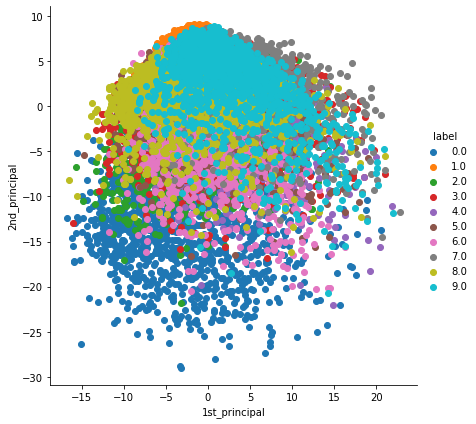

In [99]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# **7. Clusterting**

앞서 배운 **지도학습**(Supervised learning)은 target variable이 존재합니다. 정답을 알고 그것을 학습에 이용하는 방법입니다. 그러나 target variable을 모를 경우 지도학습이 불가합니다. 이때 정답을 모르는 상태로 학습하는 **비지도학습**(Unsupervised learning)을 사용합니다. 이 중 비슷한 값끼리 묶어서 class를 나누는 것을 **Clustering**이라고 합니다. 

우리는 그 중 대표적인 K-Means Clustering에 대해 알아보겠습니다.

## 7.1 K-Means Algorithm

K-means clustering은 분류가 되어있지 않은 데이터를 분류할 때 사용합니다. 미리 정해놓은 개수 K의 클러스터로 데이터를 묶어냅니다. 주어진 데이터들을 반복적으로 K개의 클러스터 중 하나로 할당하는 방법으로 학습을 진행하여 가까운 데이터들끼리 같은 클러스터에 할당되게 됩니다.

<img src="https://miro.medium.com/max/2160/1*tWaaZX75oumVwBMcKN-eHA.png
" width="700" height="300" />

K-Means clustering은 레이블이 지정되지 않은 데이터를 중심부(centroid)를 기반으로 clustering 을 합니다. 

이 때 중심부는 각 cluster 의 중심을 의미합니다. K-Means clustering은 다음 2가지 step을 반복적으로 수행하면서 이루어집니다. 

1. Data assignment step
각 centroid는 하나의 cluster를 의미합니다. 모든 데이터들은 각자 자신과 가장 가까운 centroid에 해당하는 cluster에 속하게 됩니다. 

2. Centroid update step
각 data가 cluster에 배정이 되었다면, 이제 cluster에 속해 있는 data들의 평균 위치로 centroid가 다시 갱신됩니다. 

더이상 data들의 cluster가 변하지 않을 때까지 이 두가지 과정을 반복적으로 수행하게 됩니다. 이 알고리즘은 반드시 수렴하게 되어있지만 초기화 하는 방식에 따라서 local optimum으로 수렴하게 될 수도 있습니다. K-Means clustering의 과정을 그림으로 보겠습니다. 

<img src="https://i.ytimg.com/vi/_aWzGGNrcic/hqdefault.jpg
" width="600" height="450" />

## 7.2 Optimization Objective

$$J(c^{(1)}, \cdots, c^{(m)}, \mu_1, \cdots, \mu_k) = \frac{1}{m} \sum_{i=1}^m \lVert x^{(i)} - \mu_{c^{(i)}} \rVert ^2$$

위에 있는 notation 먼저 확인하겠습니다.

- $m$: 데이터 개수
- $k$: cluster class 개수
- $c^{(m)}$: m번째 데이터가 가지는 cluster class
- $\mu_k$: k번째 cluster centroid
- $x^{(i)}$: i번째 feature vector
- $\mu_{(c^{(i)})}$: i번째 데이터가 가지는 class의 centroid

즉, 위의 식을 최소하하는 것이 K-means cluster를 최적화하는 방법입니다.

## 7.3 Random initialization

cluster centroid를 정할 때, 완전 무작위하게 정한다면 데이터랑 완전히 동떨어지게 centroid가 정해질 수 있습니다. 즉, 임의의 centroid가 아무 데이터를 갖지 못해서 clustering이 불가합니다. 이를 방지하기 위해 두 가지 조건을 통해 K를 설정하면 됩니다.

- $K(cluster의 개수) < m(data의 개수)$
- centroid를 m개의 데이터 중에서 고른다.

## 7.4 Local Optima

Random initialization에서 구한 조건을 지켜도 clustering을 할 때, 값들은 조금씩 다르게 나옵니다. 

<img src = "https://img1.daumcdn.net/thumb/R1280x0.fpng/?fname=http://t1.daumcdn.net/brunch/service/user/17Xk/image/Fo8yCACTRRyBu1_0LgALpOveObU.png" width="700" height="400">

위 그림을 보면 오른쪽 위의 경우, clustering이 잘 된 것을 확인할 수 있지만 오른쪽 아래의 두 경우는 clustering이 최적화되진 않은 것을 볼 수 있습니다. 이는 처음 cluster centroid가 정해지는 위치에 따라 결과가 달라지기 때문입니다. 앞서 배운 gradient descent의 loacl minimum처럼 local optima에 머무르게 되는 것입니다. 

이를 방지하기 위해서 여러 cluster들을 얻어서 objective function 값 중 가장 작은 것을 택하면 어느 정도 local optima를 해결할 수 있습니다.

## 7.5 Choosing the value of K - The Elbow method

K-means algorithm은 우리가 정해놓은 K값에 따라 작동합니다. 그래서 K를 정하는 것은 매우 중요합니다. 여러 방법 중 **Elbow method**에 대해 알아보겠습니다. 

K를 하나씩 증가시켜보면서 cost function의 감소폭을 그려보면 다음과 같습니다.

<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png
" width="700" height="400" />

K가 작을 때는 cost function의 감소폭이 크지만 어느 정도 감소가 되면 감소폭이 크게 줄어듭니다. 왜냐하면 어느 정도 clustering이 끝난 상태에서 K를 늘려도 clustering이 의미가 없기 떄문입니다. 그렇기에 cost function이 가파르게 줄어드는 마지막 지점의 K를 선택하고 이 방법이 elbow method라고 합니다.

## 7.6 K-mean clustering의 한계

K-mean clustering은 간단하지만 선형적인 것만 clustering할 수 있다는 한계가 있습니다. 

<img src = "https://qph.fs.quoracdn.net/main-qimg-e2160d2c444db3abccea76ce0ac539c0" width="700" height="400">

위와 같이 비선형적인 데이터들은 k-mean clustering으로 분류가 불가능합니다. 

이러한 데이터들을 분류하기 위해 DBscan clustering이 있습니다. 이를 사용하면 아래 사진처럼 clustering됩니다.

<img src = "https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-30.png" width="700" height="400">

## 실습. Elbow method 이용하기

### 1) 데이터 가져오기

먼저 데이터를 가져오겠습니다. 데이터에 대한 설명은 아래 링크에 있습니다.

https://www.kaggle.com/uciml/iris

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data/Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values

In [16]:
dataset.info()
dataset[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


이제 scikit-learn 속의 K-means 패키지를 이용해서 진행하겠습니다.

K를 1부터 10까지 진행하며 cost function을 측정해보겠습니다.

In [18]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The elbow method를 사용하기 위해 그래프를 그려보겠습니다.

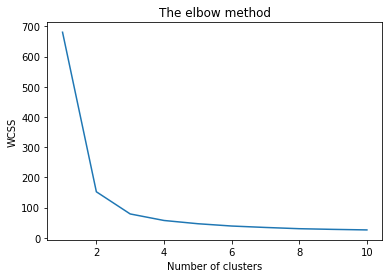

In [19]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

K를 3으로 설정하고 K-means를 수행해보겠습니다.

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

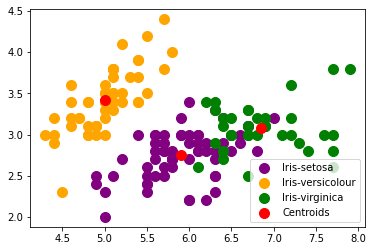

In [21]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

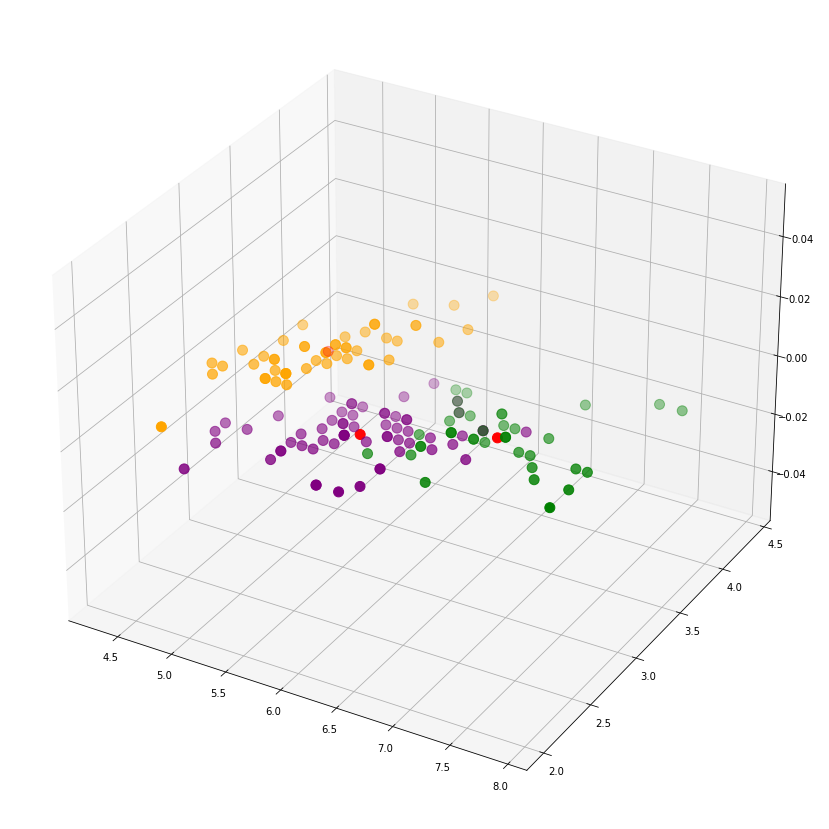

In [22]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()